# Kalendář F1 2023: analýza pro iROZHLAS.cz

rešerše k článku o nové sezoně MS

## Exekutivní summary

V neděli 5. března začíná nová sezóna Mistrovství světa Formule 1. Čím je letošní kalendář závodů zajímavý?

### Rekordy: Branky body vteřiny style

- Všude se píše o tom, že se pojede rekordních 23 závodů. Ale to není jediné!
- Taky se pojede nejvíc (v absolutních číslech *i relativně*) velkých cen v noci a na městských tratích.
- (Městské trati jsou jiné než dřív: rychlé, s dlouhými rovinkami. A hodně se na nich bourá. → Zajímavé na koukání.)
- Poprvé za několik desítek let se bude závodit v sobotu, ve Vegas.
- V USA se jedou tři závody, to se stalo jen 2× v celé historii seriálu – a mluví se o čtvrtém.
- GRAF: Počty závodů celkem x počty městských závodů x počty závodů v noci.

### Problém č. 1: mezi okruhy se toho nalítá nejvíc

- Seriál je nejdelší i co do cestování.
- Což je paradox – promotér mluví o tom, že chce F1 ozelenit.
- Stále se ale hopsá z kontinentu na kontinent pro jediný závod.
- Nacestuje se 2× víc, než by bylo v ideálním případě nutné – taky rekord.

### Problém č. 2: jezdí se v zemích nerespektujících lidská práva

- Actually to není rekord, jen dorovnání několika rekordů.
- Od r. 2021 se jezdí v Saúdské Arábii – třetí nejhorší zemi podle Human Freedom Index od CATO.
- Před 20 lety byla "nejhorší" zemí podle CATO v seriálu Malajsie. Teď je jich tam PĚT horších.
- Jezdí se v historicky nejvíc zemích, které v posledních 3 letech někoho popravily.
- Od 90. let nejvyšší počet zemí, které mají v trestním právu trest smrti (i když actually nemusí popravovat).
- Za posledních 10 let letos nejvíc zemí, které trestají homosexualitu.

## Zdroje

- výsledky: [Ergast](http://ergast.com/mrd/)
- lidská práva-žebříček: [Cato](https://www.cato.org/human-freedom-index/2022)
- ostatní: Wikipedia

## Hlavní skript

In [18]:
%run prepareStats.py

Last GP in the database: the 2022 Abu Dhabi Grand Prix


In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

## Definice

In [3]:
Europe = ["Austria", "Austrian", "Azerbaijan", "Belgian", "Belgium", "British", "Czech", "Danish", "Dutch", "East German", "Finnish", "France", "French", "German", "Germany", "Hungarian", "Hungary", "Irish", "Italian", "Italy", "Liechtensteiner", "Monaco", "Monegasque", "Netherlands", "Polish", "Portugal", "Portuguese", "Russia", "Russian", "Spanish", "Spain", "Sweden", "Swedish", "Swiss", "Switzerland", "Turkey", "UK"]
NAmerica = ["American", "Canada", "Canadian", "Mexican", "Mexico", "USA"]
SAmerica = ["Argentina", "Argentine", "Brazil", "Brazilian", "Chilean", "Colombian", "Uruguayan", "Venezuelan"]
Asia = ["Bahrain", "Chinese", "China", "Hong Kong", "India", "Indian", "Indonesian", "Japan", "Japanese", "Korea", "Malaysia", "Malaysian", "Qatar", "Saudi Arabia", "Singapore", "Thai", "UAE"]
Africa = ["Morocco", "Rhodesian", "South Africa", "South African"]
Oceania = ["Australia", "Australian", "New Zealander"]
multiple = ["American-Italian", "Argentine-Italian"]
westernEurope = ["Austria", "Belgium", "Germany", "France", "Italy", "Monaco", "Netherlands", "Portugal", "Spain", "Sweden", "Switzerland", "UK"]

In [4]:
streetCircuits = ["Melbourne", "Miami", "Monte-Carlo", "Montreal", "Valencia", "Marina Bay", "Las Vegas", "Sochi", "Baku", "Jeddah", "Adelaide", "Phoenix", "Detroit", "Dallas", "Nevada", "Oporto", "Lisbon"]

In [5]:
tilkedromes = ["Kuala Lumpur", "Sakhir", "Istanbul", "Valencia", "Marina Bay", "Shanghai", "Abu Dhabi", "Yeongam County", "Uttar Pradesh", "Austin", "Sochi", "Baku", "Jeddah"]

In [6]:
nightRaces = ["Marina Bay", "Abu Dhabi", "Las Vegas", "Jeddah", "Al Daayen"]

In [7]:
westernEurope = ["Austria", "Belgium", "Germany", "France", "Italy", "Monaco", "Netherlands", "Portugal", "Spain", "Sweden", "Switzerland", "UK"]

## Dummy data pro sezónu 2023

In [8]:
gps2023 = pd.read_csv(os.path.join("dataHandCollected", "2023calendar.csv"), index_col=False)

In [9]:
gps2023

,year,round,raceId,date,location,country
0,2023,1,1097,2023-03-05,Sakhir,Bahrain
1,2023,2,1098,2023-03-19,Jeddah,Saudi Arabia
2,2023,3,1099,2023-04-02,Melbourne,Australia
3,2023,4,1100,2023-04-30,Baku,Azerbaijan
4,2023,5,1101,2023-05-07,Miami,USA
5,2023,6,1102,2023-05-21,Imola,Italy
6,2023,7,1103,2023-05-28,Monte-Carlo,Monaco
7,2023,8,1104,2023-06-04,Montmeló,Spain
8,2023,9,1105,2023-06-18,Montreal,Canada
9,2023,10,1106,2023-07-02,Spielberg,Austria


## Spojení s ofiko výsledky

In [10]:
gps_results = results.groupby(["raceId"])["year","round","raceId","date","location","country"].first()

C:\Users\micha\AppData\Local\Temp\ipykernel_22412\960375533.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gps_results = results.groupby(["raceId"])["year","round","raceId","date","location","country"].first()


In [11]:
gps_results

,year,round,raceId,date,location,country
raceId,,,,,,
1,2009,1,1,2009-03-29,Melbourne,Australia
2,2009,2,2,2009-04-05,Kuala Lumpur,Malaysia
3,2009,3,3,2009-04-19,Shanghai,China
4,2009,4,4,2009-04-26,Sakhir,Bahrain
5,2009,5,5,2009-05-10,Montmeló,Spain
...,...,...,...,...,...,...
1092,2022,18,1092,2022-10-09,Suzuka,Japan
1093,2022,19,1093,2022-10-23,Austin,USA
1094,2022,20,1094,2022-10-30,Mexico City,Mexico


In [12]:
gps = pd.concat([gps_results[["year","round","raceId","date","location","country"]], gps2023])

In [13]:
gps["date"] = pd.to_datetime(gps["date"])

In [14]:
gps = gps.sort_values(by="date")

In [15]:
gps

,year,round,raceId,date,location,country
833,1950,1,833,1950-05-13,Silverstone,UK
834,1950,2,834,1950-05-21,Monte-Carlo,Monaco
835,1950,3,835,1950-05-30,Indianapolis,USA
836,1950,4,836,1950-06-04,Bern,Switzerland
837,1950,5,837,1950-06-18,Spa,Belgium
...,...,...,...,...,...,...
18,2023,19,1115,2023-10-22,Austin,USA
19,2023,20,1116,2023-10-29,Mexico City,Mexico
20,2023,21,1117,2023-11-05,São Paulo,Brazil
21,2023,22,1118,2023-11-18,Las Vegas,USA


## Doplnění detailů

In [16]:
gps["street"]=False
gps.loc[gps.location.isin(streetCircuits),"street"]=True

results["street"]=False
results.loc[results.location.isin(streetCircuits),"street"]=True
gps.loc[(gps.location == "California") & (gps.year >=1970),"street"]=True

gps["tilkedrome"]=False
gps.loc[gps.location.isin(tilkedromes),"tilkedrome"]=True

gps.loc[(gps.location == "Hockenheim") & (gps.year > 2002),"tilkedrome"]=True
gps.loc[(gps.location == "Spielberg") & (gps.year > 1996),"tilkedrome"]=True
gps.loc[(gps.location == "Oyama") & (gps.year > 2005),"tilkedrome"]=True
gps.loc[(gps.location == "Montmeló") & (gps.year > 2007),"tilkedrome"]=True
gps.loc[(gps.location == "Nürburg") & (gps.year > 2002),"tilkedrome"]=True
gps.loc[(gps.location == "Mexico City") & (gps.year > 2014),"tilkedrome"]=True

gps["night"]=False
gps.loc[gps.location.isin(nightRaces),"night"]=True
gps.loc[(gps.location == "Sakhir") & (gps.year >= 2014),"night"]=True

gps["westernEurope"] = False
gps.loc[gps.country.isin(westernEurope),"westernEurope"] = True

gps.loc[gps.country.isin(Europe),"locationContinent"]="Europe"
gps.loc[gps.country.isin(NAmerica),"locationContinent"]="NAmerica"
gps.loc[gps.country.isin(SAmerica),"locationContinent"]="SAmerica"
gps.loc[gps.country.isin(Asia),"locationContinent"]="Asia"
gps.loc[gps.country.isin(Africa),"locationContinent"]="Africa"
gps.loc[gps.country.isin(Oceania),"locationContinent"]="Oceania"

In [17]:
gps["weekday"] = gps["date"].dt.dayofweek

In [18]:
circuits = pd.read_csv(os.path.join("dataErgast", "circuits.csv"))

In [19]:
gps.loc[gps["location"] == "Las Vegas","location"]="Nevada"

In [20]:
gps = gps.merge(circuits[["location","lat","lng","alt"]], on="location", how="outer")

In [21]:
gps["coordinates"] = list(zip(gps.lat, gps.lng))

In [22]:
gps

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,locationContinent,weekday,lat,lng,alt,coordinates
0,1950,1,833,1950-05-13,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
1,1951,5,829,1951-07-14,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
2,1952,5,821,1952-07-19,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
3,1953,6,813,1953-07-18,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
4,1954,5,803,1954-07-17,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2021,21,1072,2021-12-05,Jeddah,Saudi Arabia,True,True,True,False,Asia,6,21.6319,39.10440,15,"(21.6319, 39.1044)"
1113,2022,2,1075,2022-03-27,Jeddah,Saudi Arabia,True,True,True,False,Asia,6,21.6319,39.10440,15,"(21.6319, 39.1044)"
1114,2023,2,1098,2023-03-19,Jeddah,Saudi Arabia,True,True,True,False,Asia,6,21.6319,39.10440,15,"(21.6319, 39.1044)"
1115,2022,5,1078,2022-05-08,Miami,USA,True,False,False,False,NAmerica,6,25.9581,-80.23890,\N,"(25.9581, -80.2389)"


## Explorace dosavadních výsledků

### města x neměsta

<AxesSubplot:xlabel='year'>

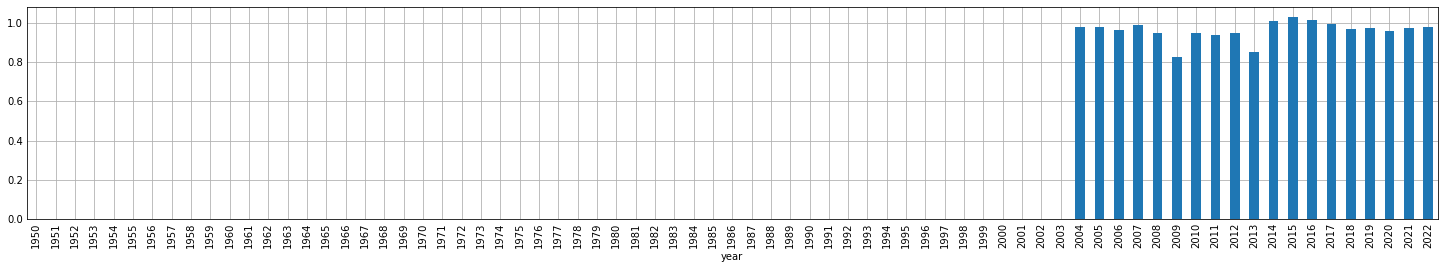

In [23]:
(results[results["street"] == True].groupby("year")["fastestLapSpeed"].median() / results[results["street"] == False].groupby("year")["fastestLapSpeed"].median()).plot.bar()

In [24]:
results[results["year"] >= 2022].groupby("location")["fastestLapSpeed"].max().sort_values(ascending=False).head(60)

location
Monza           248.182
Jeddah          242.556
Melbourne       236.740
Silverstone     234.312
Spielberg       231.063
Spa             230.575
Imola           225.281
Le Castellet    219.575
Abu Dhabi       215.085
Miami           213.255
São Paulo       210.237
Zandvoort       208.173
Montreal        207.258
Sakhir          206.018
Baku            203.787
Austin          200.902
Suzuka          200.220
Montmeló        200.099
Budapest        193.787
Mexico City     193.310
Marina Bay      171.211
Monte-Carlo     160.834
Name: fastestLapSpeed, dtype: float64

<AxesSubplot:xlabel='year'>

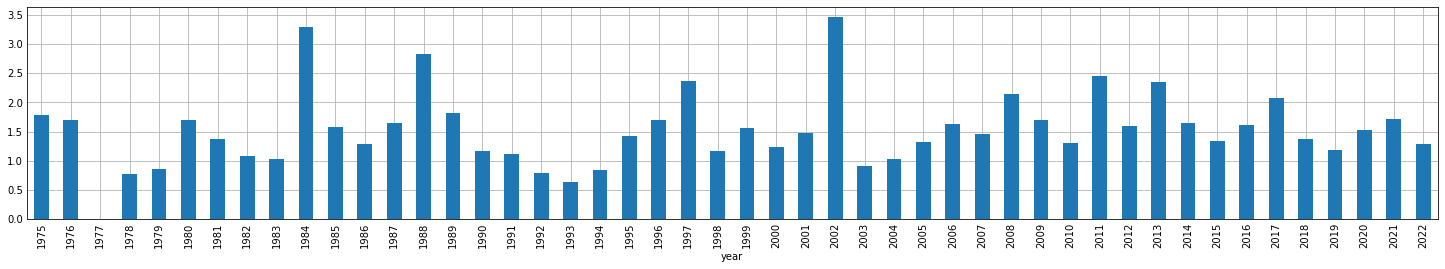

In [25]:
res75 = results[results["year"] >= 1975]

((res75[(res75["street"] == True) & (res75.status.isin(crashes))].groupby("year")["resultId"].nunique() / res75[(res75["street"] == True)].groupby("year")["resultId"].nunique()) / (res75[(res75["street"] == False) & (res75.status.isin(crashes))].groupby("year")["resultId"].nunique() / res75[(res75["street"] == False)].groupby("year")["resultId"].nunique())).plot.bar()

### Nehody

In [26]:
res13 = results[results["year"] >= 2013]
circ13 = pd.Series(res13.groupby("location")["raceId"].nunique(), name="circCount")
res13 = res13.merge(circ13, on="location", how="left")

In [27]:
res13 = res13[res13["circCount"] >= 5]

(res13[res13.status.isin(crashes)].groupby("location")["resultId"].nunique() / res13.groupby("location")["resultId"].nunique()).sort_values(ascending=False)

location
Monte-Carlo     0.118280
Marina Bay      0.102410
Silverstone     0.101770
Baku            0.090164
Sochi           0.085890
Montreal        0.078313
São Paulo       0.076923
Austin          0.071429
Spa             0.063107
Montmeló        0.058252
Budapest        0.053398
Spielberg       0.049107
Melbourne       0.048780
Suzuka          0.048193
Shanghai        0.047945
Sakhir          0.044248
Monza           0.043689
Mexico City     0.042254
Abu Dhabi       0.029412
Kuala Lumpur    0.028302
Name: resultId, dtype: float64

In [28]:
res13[(res13.status.isin(crashes))].groupby("street")["resultId"].nunique() / res13.groupby("street")["resultId"].nunique()

street
False    0.055556
True     0.087901
Name: resultId, dtype: float64

### Kdy se naposledy jelo jindy než v neděli

In [29]:
gps[gps["year"] <= 2022].sort_values(by="date").groupby("weekday")[["date","location"]].last()

,date,location
weekday,,
0,1972-05-01,Madrid
1,1950-05-30,Indianapolis
2,1956-05-30,Indianapolis
3,1957-05-30,Indianapolis
4,1965-01-01,Eastern Cape Province
5,1985-10-19,Midrand
6,2022-11-20,Abu Dhabi


In [30]:
gps[(gps["location"] != "Indianapolis") & (gps["year"] <= 2022)].groupby("weekday")[["date","location"]].last()

,date,location
weekday,,
0,1972-05-01,Madrid
4,1965-01-01,Eastern Cape Province
5,1982-09-25,Nevada
6,2022-05-08,Miami


In [31]:
gps[gps["year"] <= 2022].groupby("weekday")["raceId"].nunique()

weekday
0       9
1       1
2       2
3       1
4       3
5      57
6    1006
Name: raceId, dtype: int64

In [32]:
gps[(gps["year"] <= 2022) & (gps["weekday"] != 6)]

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,locationContinent,weekday,lat,lng,alt,coordinates
0,1950,1,833,1950-05-13,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
1,1951,5,829,1951-07-14,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
2,1952,5,821,1952-07-19,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
3,1953,6,813,1953-07-18,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
4,1954,5,803,1954-07-17,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1969,9,664,1969-09-20,Ontario,Canada,False,False,False,False,NAmerica,5,44.0481,-78.67560,332,"(44.0481, -78.6756)"
528,1972,3,622,1972-05-01,Madrid,Spain,False,False,False,True,Europe,0,40.6171,-3.58558,609,"(40.6171, -3.58558)"
686,1978,8,534,1978-06-17,Anderstorp,Sweden,False,False,False,True,Europe,5,57.2653,13.60420,153,"(57.2653, 13.6042)"
780,1981,15,497,1981-10-17,Nevada,USA,True,False,False,False,NAmerica,5,36.1162,-115.17400,639,"(36.1162, -115.174)"


## Explorace se sezónou 2023

### Počet závodů

In [33]:
pocty_vc = gps.groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

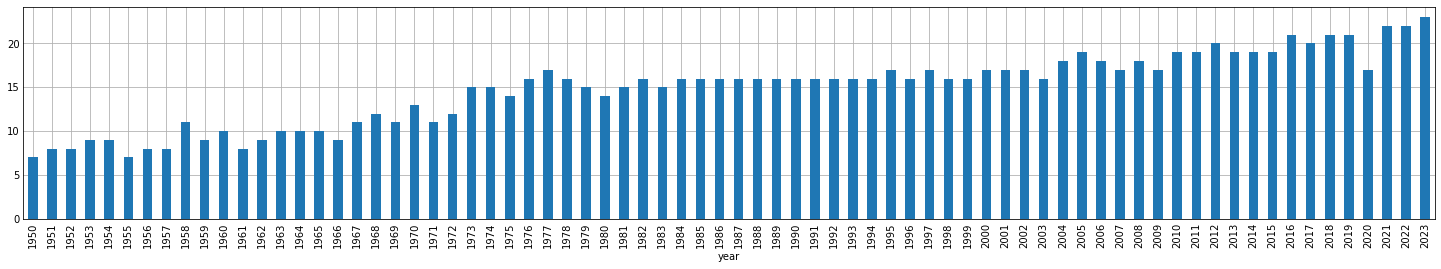

In [34]:
pocty_vc.plot.bar()

In [35]:
gps.groupby("year")["raceId"].nunique().nlargest()

year
2023    23
2021    22
2022    22
2016    21
2018    21
Name: raceId, dtype: int64

### Nové okruhy

In [36]:
gps.groupby("location")["year"].min().sort_values().tail(20)

location
Castle Donington    1993
Okayama             1994
Melbourne           1996
Kuala Lumpur        1999
Sakhir              2004
Shanghai            2004
Istanbul            2005
Valencia            2008
Marina Bay          2008
Abu Dhabi           2009
Yeongam County      2010
Uttar Pradesh       2011
Austin              2012
Sochi               2014
Baku                2016
Mugello             2020
Portimão            2020
Al Daayen           2021
Jeddah              2021
Miami               2022
Name: year, dtype: int64

### Okruhy navržené kanceláří H. Tilkeho

In [37]:
tilkeRatio = gps[gps["tilkedrome"] == True].groupby("year")["raceId"].nunique() / gps.groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

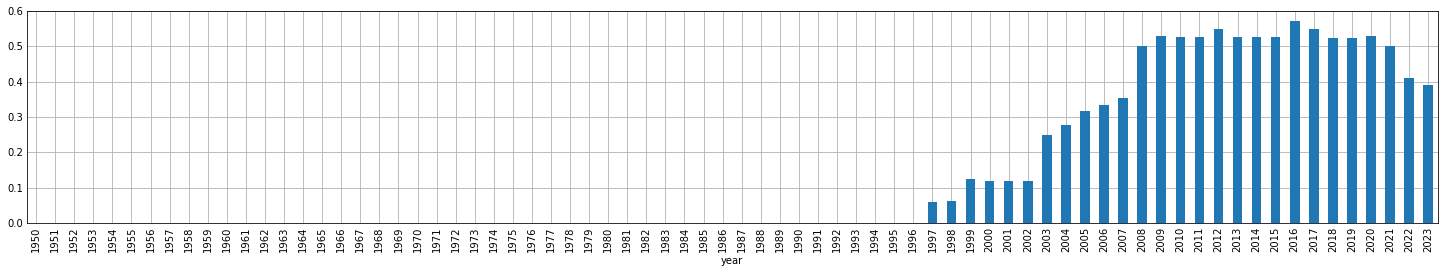

In [38]:
tilkeRatio.plot.bar()

### Městské okruhy

In [39]:
pocty_mesta = gps[gps["street"] == True].groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

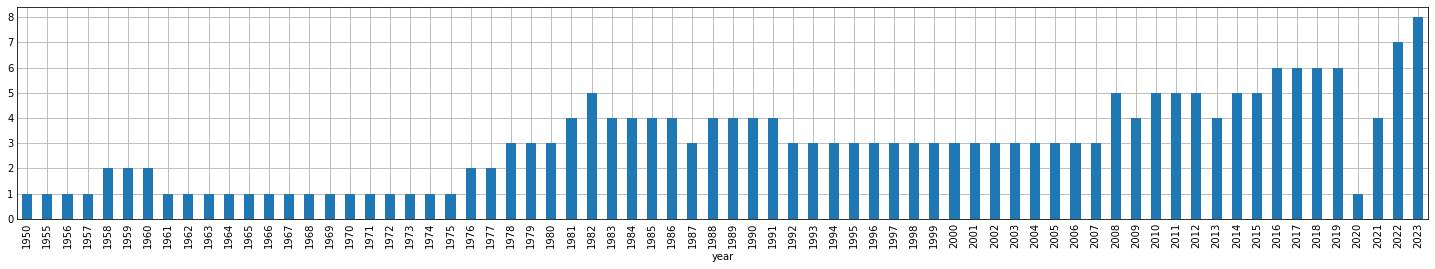

In [40]:
pocty_mesta.plot.bar()

In [41]:
podil_mesta = gps[gps["street"] == True].groupby("year")["raceId"].nunique() / gps.groupby("year")["raceId"].nunique()

**Poprvé se víc než třetina závodů jede ve městech.**

In [42]:
podil_mesta.nlargest(3)

year
2023    0.347826
2022    0.318182
1982    0.312500
Name: raceId, dtype: float64

<AxesSubplot:xlabel='year'>

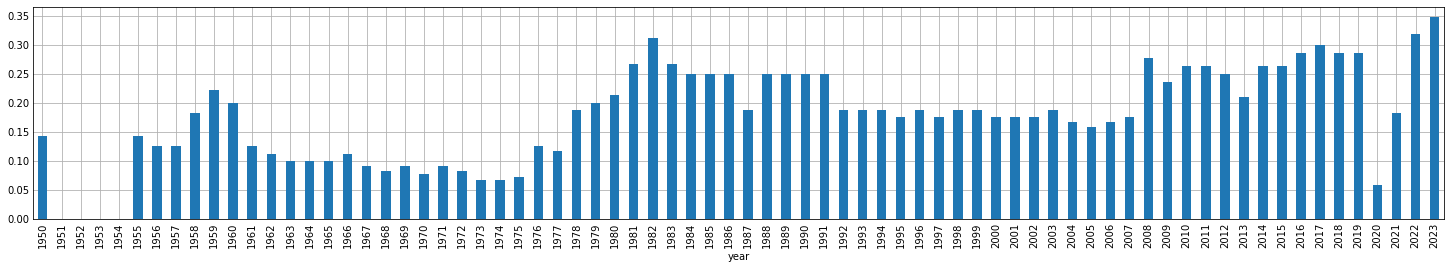

In [43]:
podil_mesta.plot.bar()

In [44]:
gps[gps["street"] == True].groupby("year")["raceId"].nunique().nlargest(5)

year
2023    8
2022    7
2016    6
2017    6
2018    6
Name: raceId, dtype: int64

<AxesSubplot:xlabel='year'>

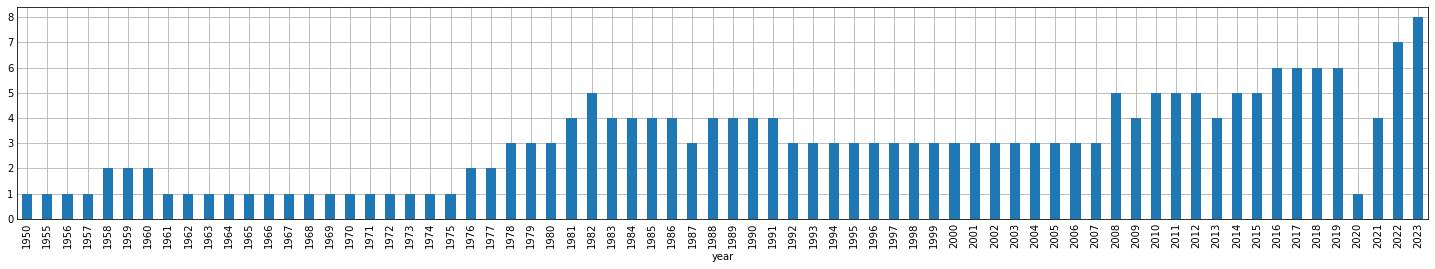

In [45]:
gps[gps["street"] == True].groupby("year")["raceId"].nunique().plot.bar()

In [46]:
gps[(gps["street"] == True) & (gps["year"] == 2020)]

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,locationContinent,weekday,lat,lng,alt,coordinates
1098,2020,10,1040,2020-09-27,Sochi,Russia,True,True,False,False,Europe,6,43.4057,39.9578,2,"(43.4057, 39.9578)"


### Noční závody

In [47]:
pocty_noc = gps[gps["night"] == True].groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

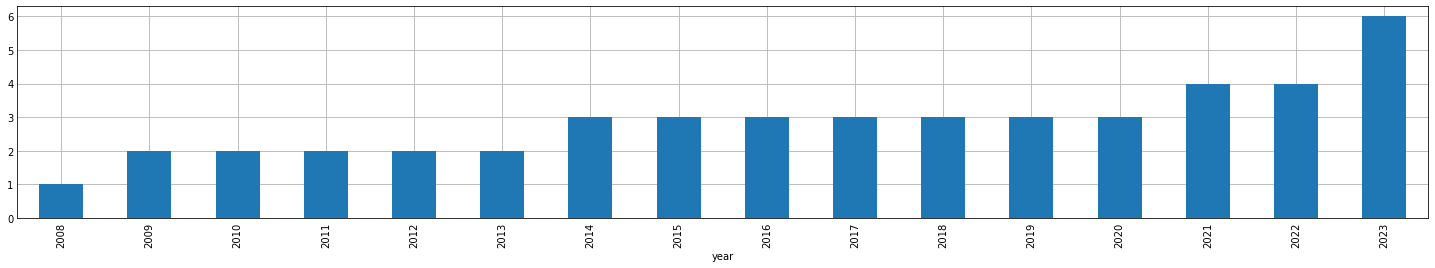

In [48]:
pocty_noc.plot.bar()

In [49]:
podil_noc = (gps[gps["night"] == True].groupby("year")["raceId"].nunique() / gps.groupby("year")["raceId"].nunique())

<AxesSubplot:xlabel='year'>

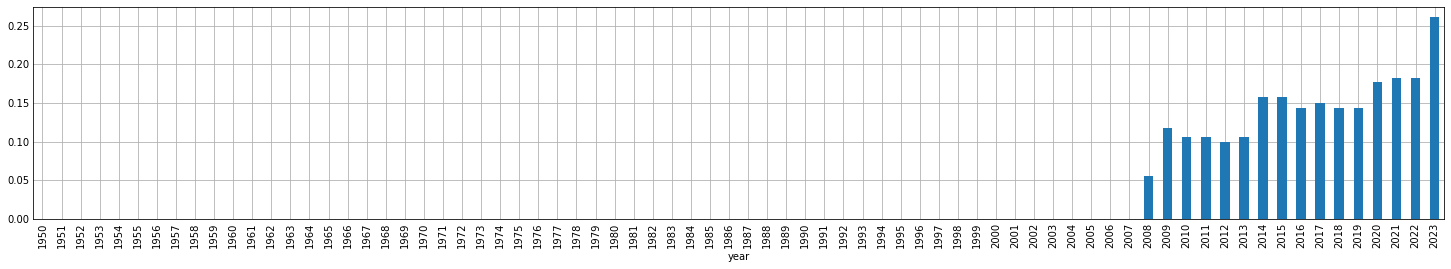

In [50]:
podil_noc.plot.bar()

In [51]:
nocni_zavody = gps[gps["night"] == True].groupby("year")["raceId"].nunique()

## Graf1

In [52]:
gps[(gps["year"] == 1960) & gps["street"] == True]

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,locationContinent,weekday,lat,lng,alt,coordinates
64,1960,2,747,1960-05-29,Monte-Carlo,Monaco,True,False,False,True,Europe,6,43.7347,7.42056,7,"(43.7347, 7.42056)"
409,1960,8,753,1960-08-14,Oporto,Portugal,True,False,False,True,Europe,6,41.1705,-8.67325,28,"(41.1705, -8.67325)"


In [53]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

In [54]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

In [55]:
graf1 = pd.DataFrame([pocty_vc, podil_mesta, podil_noc]).transpose().set_axis(['Počet závodů v kalendáři MS','Podíl městských okruhů','Podíl závodů pod umělým osvětlením'], axis=1, inplace=False)
graf1

,Počet závodů v kalendáři MS,Podíl městských okruhů,Podíl závodů pod umělým osvětlením
year,,,
1950,7.0,0.142857,NaN
1951,8.0,NaN,NaN
1952,8.0,NaN,NaN
1953,9.0,NaN,NaN
1954,9.0,NaN,NaN
...,...,...,...
2019,21.0,0.285714,0.142857
2020,17.0,0.058824,0.176471
2021,22.0,0.181818,0.181818


In [56]:
graf1.to_csv("graf1.csv")

In [57]:
years = [x for x in range(1950,2024)]

In [58]:
plt.rcParams["axes.grid"] = True

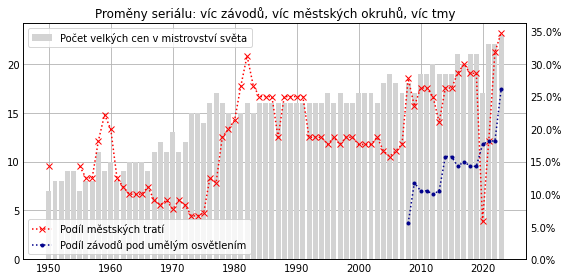

In [59]:
fig,ax = plt.subplots()
plt.bar(years,pocty_vc, color = "lightgrey", label="Počet velkých cen v mistrovství světa")
plt.title("Proměny seriálu: víc závodů, víc městských okruhů, víc tmy")
plt.legend()
plt.legend(loc = "upper left")
ax2=ax.twinx()
xticks = mtick.PercentFormatter(1)
ax2.yaxis.set_major_formatter(xticks)
ax2.plot(podil_mesta, marker="x", linestyle="dotted", color = "red", label="Podíl městských tratí")
ax2.plot(podil_noc, marker=".", linestyle="dotted", color = "darkblue", label="Podíl závodů pod umělým osvětlením")
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.legend()
plt.legend(loc = "lower left")
ax2.grid(axis="both", which="both")
plt.savefig("graf1.svg",  bbox_inches='tight')
plt.show()

### Závody po kontinentech, oblastech a státech

<AxesSubplot:xlabel='year'>

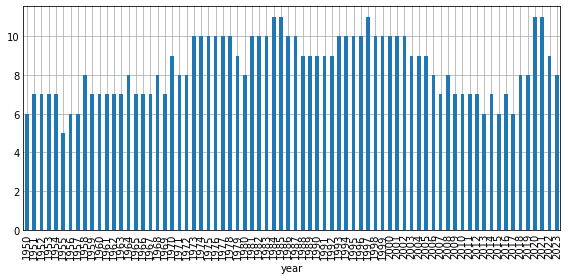

In [60]:
gps[gps["westernEurope"] == True].groupby("year")["raceId"].nunique().plot.bar()

In [61]:
gps.groupby(["year","country"])["raceId"].nunique().nlargest(5)

year  country
1982  USA        3
2020  Italy      3
2023  USA        3
1957  Italy      2
1959  USA        2
Name: raceId, dtype: int64

In [62]:
gps.groupby(["year","locationContinent"])["raceId"].nunique().nlargest(5)

year  locationContinent
2021  Europe               15
2020  Europe               14
1997  Europe               12
1984  Europe               11
1985  Europe               11
Name: raceId, dtype: int64

In [63]:
gps[gps["year"] == 2023].groupby("locationContinent")["raceId"].nunique()

locationContinent
Asia         6
Europe      10
NAmerica     5
Oceania      1
SAmerica     1
Name: raceId, dtype: int64

In [64]:
gps.groupby(["locationContinent","year"])["raceId"].nunique().groupby("locationContinent").max().nlargest(6)

locationContinent
Europe      15
Asia         8
NAmerica     5
SAmerica     2
Africa       1
Oceania      1
Name: raceId, dtype: int64

In [65]:
gps.groupby("country")["location"].nunique().nlargest(5)

country
USA         10
France       7
Spain        5
Italy        4
Portugal     4
Name: location, dtype: int64

## Kalendáře

In [66]:
gps["mesic"] = pd.DatetimeIndex(gps['date']).month

In [67]:
gps

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,locationContinent,weekday,lat,lng,alt,coordinates,mesic
0,1950,1,833,1950-05-13,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)",5
1,1951,5,829,1951-07-14,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)",7
2,1952,5,821,1952-07-19,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)",7
3,1953,6,813,1953-07-18,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)",7
4,1954,5,803,1954-07-17,Silverstone,UK,False,False,False,True,Europe,5,52.0786,-1.01694,153,"(52.0786, -1.01694)",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2021,21,1072,2021-12-05,Jeddah,Saudi Arabia,True,True,True,False,Asia,6,21.6319,39.10440,15,"(21.6319, 39.1044)",12
1113,2022,2,1075,2022-03-27,Jeddah,Saudi Arabia,True,True,True,False,Asia,6,21.6319,39.10440,15,"(21.6319, 39.1044)",3
1114,2023,2,1098,2023-03-19,Jeddah,Saudi Arabia,True,True,True,False,Asia,6,21.6319,39.10440,15,"(21.6319, 39.1044)",3
1115,2022,5,1078,2022-05-08,Miami,USA,True,False,False,False,NAmerica,6,25.9581,-80.23890,\N,"(25.9581, -80.2389)",5


In [68]:
gps.groupby("location")["mesic"].nunique().nlargest(10)

location
Nürburg        7
São Paulo      7
Istanbul       5
Mexico City    5
Montmeló       5
Silverstone    5
Spa            5
Spielberg      5
Zandvoort      5
Imola          4
Name: mesic, dtype: int64

In [69]:
gps.groupby([pd.Grouper(key = "date", freq = 'M')])["raceId"].nunique().nlargest(15)

date
2005-07-31    4
2016-07-31    4
2016-10-31    4
2017-10-31    4
2018-07-31    4
2019-09-30    4
2020-08-31    4
2022-07-31    4
2022-10-31    4
2023-07-31    4
1950-05-31    3
1951-07-31    3
1958-05-31    3
1959-05-31    3
1963-06-30    3
Name: raceId, dtype: int64

In [70]:
gps.groupby([pd.Grouper(key = "date", freq = '21D')])["raceId"].nunique().nlargest(15)

date
1950-05-13    3
1958-05-10    3
2020-07-04    3
2020-11-28    3
2021-08-28    3
2023-05-20    3
1950-06-03    2
1951-05-26    2
1951-06-16    2
1952-05-17    2
1952-07-19    2
1953-05-30    2
1953-06-20    2
1954-07-03    2
1955-05-14    2
Name: raceId, dtype: int64

## Vzdálenosti mezi okruhy

In [71]:
import geopy.distance
from geopy.distance import great_circle

In [72]:
import geopandas as gpd

In [73]:
def rocnik_na_mape(year):
    fig, ax = plt.subplots(figsize=(8,6))
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="lightgrey",ax=ax)
    # gps[gps.location.isin(zrusene)].plot(x="lng", y="lat", kind="scatter", 
    #        c="yellow", colormap="YlOrRd", 
    #        ax=ax)
    gps[gps["year"] == year].plot(x="lng", y="lat", kind="scatter", 
            c="green", colormap="YlOrRd", 
            ax=ax)
    plt.show()

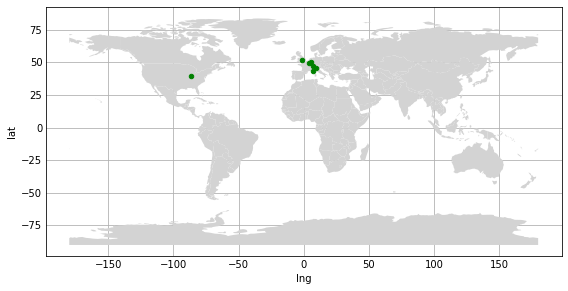

In [74]:
rocnik_na_mape(1950)

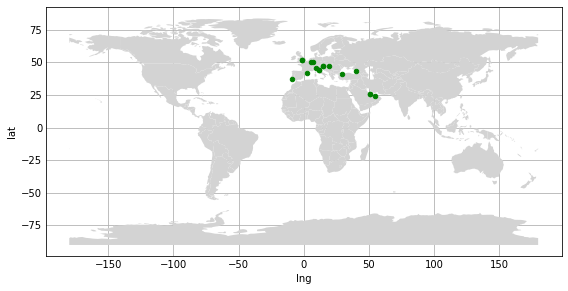

In [75]:
rocnik_na_mape(2020)

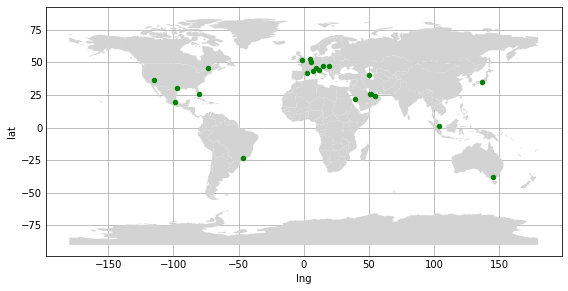

In [76]:
rocnik_na_mape(2023)

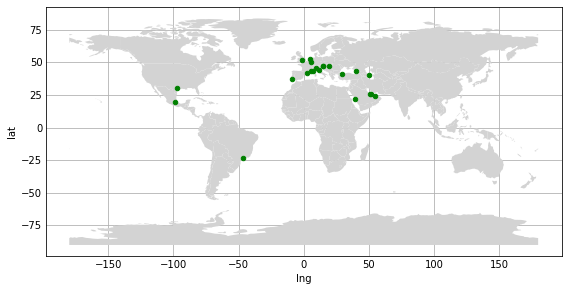

In [77]:
rocnik_na_mape(2021)

In [78]:
def seasonTravel(year, Indy):
    season = gps[gps["year"] == year]
    season_rounds = season["round"].max()
    season_travel = 0
    print("SEZÓNA " + str(year))
    for x in range(1, season_rounds):
        if (Indy == False) & (year < 2000) & (season[season["round"] == x+1]["location"].iloc[0] == "Indianapolis"):
            print("Do Indy nejedeme.")
        elif (Indy == False) & (year < 2000) & (season[season["round"] == x]["location"].iloc[0] == "Indianapolis"):
            print("Z Indy nejedeme, čili jedeme:")
            trip = great_circle(season[season["round"] == x-1]["coordinates"].iloc[0], season[season["round"] == x+1]["coordinates"].iloc[0]).km
            season_travel = season_travel + trip
            print(season[season["round"] == x-1]["location"].iloc[0] + " → " + season[season["round"] == x+1]["location"].iloc[0] + ": " + str(int(trip)) + " km")
        else:
            trip = great_circle(season[season["round"] == x]["coordinates"].iloc[0], season[season["round"] == x+1]["coordinates"].iloc[0]).km
            season_travel = season_travel + trip
            print(season[season["round"] == x]["location"].iloc[0] + " → " + season[season["round"] == x+1]["location"].iloc[0] + ": " + str(int(trip)) + " km")
    print("Total: " + str(int(season_travel)) + " km")
    return(season_travel)

In [79]:
seasonTravel(1960, False)

SEZÓNA 1960
Buenos Aires → Monte-Carlo: 10971 km
Do Indy nejedeme.
Z Indy nejedeme, čili jedeme:
Monte-Carlo → Zandvoort: 985 km
Zandvoort → Spa: 238 km
Spa → Reims: 196 km
Reims → Silverstone: 469 km
Silverstone → Oporto: 1344 km
Oporto → Monza: 1528 km
Monza → California: 9730 km
Total: 25465 km


25465.54171518109

In [80]:
seasons_distance = {}
for x in range(1950,2024):
    seasons_distance[x] = seasonTravel(x,True)
seasons_distance = pd.Series(seasons_distance)

SEZÓNA 1950
Silverstone → Monte-Carlo: 1119 km
Monte-Carlo → Indianapolis: 7336 km
Indianapolis → Bern: 7143 km
Bern → Spa: 400 km
Spa → Reims: 196 km
Reims → Monza: 570 km
Total: 16767 km
SEZÓNA 1951
Bern → Indianapolis: 7143 km
Indianapolis → Spa: 6857 km
Spa → Reims: 196 km
Reims → Silverstone: 469 km
Silverstone → Nürburg: 587 km
Nürburg → Monza: 552 km
Monza → Barcelona: 743 km
Total: 16550 km
SEZÓNA 1952
Bern → Indianapolis: 7143 km
Indianapolis → Spa: 6857 km
Spa → Rouen: 376 km
Rouen → Silverstone: 337 km
Silverstone → Nürburg: 587 km
Nürburg → Zandvoort: 282 km
Zandvoort → Monza: 828 km
Total: 16412 km
SEZÓNA 1953
Buenos Aires → Indianapolis: 8759 km
Indianapolis → Zandvoort: 6666 km
Zandvoort → Spa: 238 km
Spa → Reims: 196 km
Reims → Silverstone: 469 km
Silverstone → Nürburg: 587 km
Nürburg → Bern: 376 km
Bern → Monza: 207 km
Total: 17502 km
SEZÓNA 1954
Buenos Aires → Indianapolis: 8759 km
Indianapolis → Spa: 6857 km
Spa → Reims: 196 km
Reims → Silverstone: 469 km
Silverstone

Anderstorp → Dijon: 1247 km
Dijon → Silverstone: 674 km
Silverstone → Hockenheim: 740 km
Hockenheim → Spielberg: 514 km
Spielberg → Zandvoort: 930 km
Zandvoort → Monza: 828 km
Monza → New York State: 6557 km
New York State → Ontario: 237 km
Ontario → Oyama: 10401 km
Total: 59959 km
SEZÓNA 1978
Buenos Aires → Rio de Janeiro: 1958 km
Rio de Janeiro → Midrand: 7147 km
Midrand → California: 16666 km
California → Monte-Carlo: 9787 km
Monte-Carlo → Heusden-Zolder: 822 km
Heusden-Zolder → Madrid: 1339 km
Madrid → Anderstorp: 2222 km
Anderstorp → Le Castellet: 1651 km
Le Castellet → Kent: 992 km
Kent → Hockenheim: 630 km
Hockenheim → Spielberg: 514 km
Spielberg → Zandvoort: 930 km
Zandvoort → Monza: 828 km
Monza → New York State: 6557 km
New York State → Montreal: 444 km
Total: 52494 km
SEZÓNA 1979
Buenos Aires → São Paulo: 1669 km
São Paulo → Midrand: 7439 km
Midrand → California: 16666 km
California → Madrid: 9375 km
Madrid → Heusden-Zolder: 1339 km
Heusden-Zolder → Monte-Carlo: 822 km
Monte

Magny Cours → Silverstone: 653 km
Silverstone → Spielberg: 1254 km
Spielberg → Hockenheim: 514 km
Hockenheim → Budapest: 810 km
Budapest → Spa: 1017 km
Spa → Monza: 589 km
Monza → Nürburg: 552 km
Nürburg → Kuala Lumpur: 10110 km
Kuala Lumpur → Suzuka: 5061 km
Total: 55627 km
SEZÓNA 2000
Melbourne → São Paulo: 13062 km
São Paulo → Imola: 9612 km
Imola → Silverstone: 1273 km
Silverstone → Montmeló: 1194 km
Montmeló → Nürburg: 1039 km
Nürburg → Monte-Carlo: 734 km
Monte-Carlo → Montreal: 6121 km
Montreal → Magny Cours: 5658 km
Magny Cours → Spielberg: 879 km
Spielberg → Hockenheim: 514 km
Hockenheim → Budapest: 810 km
Budapest → Spa: 1017 km
Spa → Monza: 589 km
Monza → Indianapolis: 7345 km
Indianapolis → Suzuka: 10627 km
Suzuka → Kuala Lumpur: 5061 km
Total: 65545 km
SEZÓNA 2001
Melbourne → Kuala Lumpur: 6334 km
Kuala Lumpur → São Paulo: 15901 km
São Paulo → Imola: 9612 km
Imola → Montmeló: 828 km
Montmeló → Spielberg: 1173 km
Spielberg → Monte-Carlo: 690 km
Monte-Carlo → Montreal: 6121 

Austin → Mexico City: 1201 km
Mexico City → São Paulo: 7430 km
São Paulo → Abu Dhabi: 12149 km
Total: 93769 km
SEZÓNA 2016
Melbourne → Sakhir: 12112 km
Sakhir → Shanghai: 6804 km
Shanghai → Sochi: 7021 km
Sochi → Montmeló: 3071 km
Montmeló → Monte-Carlo: 485 km
Monte-Carlo → Montreal: 6121 km
Montreal → Baku: 8930 km
Baku → Spielberg: 2890 km
Spielberg → Silverstone: 1254 km
Silverstone → Budapest: 1531 km
Budapest → Hockenheim: 810 km
Hockenheim → Spa: 223 km
Spa → Monza: 589 km
Monza → Marina Bay: 10260 km
Marina Bay → Kuala Lumpur: 287 km
Kuala Lumpur → Suzuka: 5061 km
Suzuka → Austin: 10829 km
Austin → Mexico City: 1201 km
Mexico City → São Paulo: 7430 km
São Paulo → Abu Dhabi: 12149 km
Total: 99069 km
SEZÓNA 2017
Melbourne → Shanghai: 8078 km
Shanghai → Sakhir: 6804 km
Sakhir → Sochi: 2154 km
Sochi → Montmeló: 3071 km
Montmeló → Monte-Carlo: 485 km
Monte-Carlo → Montreal: 6121 km
Montreal → Baku: 8930 km
Baku → Spielberg: 2890 km
Spielberg → Silverstone: 1254 km
Silverstone → Buda

In [81]:
seasons_distance

1950     16767.314637
1951     16550.631085
1952     16412.887905
1953     17502.808883
1954     18198.408234
            ...      
2019    106120.564348
2020     18098.210082
2021     57464.041041
2022    116138.738318
2023    132165.330960
Length: 74, dtype: float64

<AxesSubplot:>

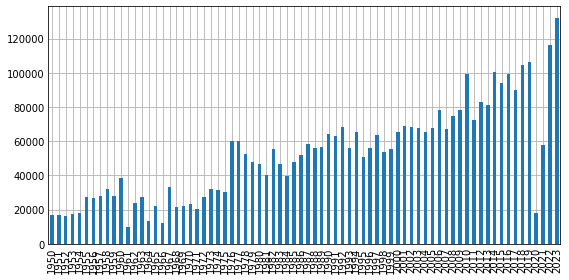

In [82]:
seasons_distance.plot.bar()

1977-2007 skoro stejně, teď dvakrát tolik!!!

Kolik jezdců závodilo v roce 1960 v Indy a ve zbytku seriálu:

In [83]:
indy500years = results[(results["location"] == "Indianapolis") & (results["year"] < 2000)]["year"].drop_duplicates().to_list()
for x in indy500years:
    indy60drivers = results[(results["year"] == x) & (results["location"] == "Indianapolis")]["name"].to_list()
    monaco60drivers = results[(results["year"] == x) & (results["location"] != "Indianapolis")]["name"].drop_duplicates().to_list()
    indyandmonaco = []
    for driver in indy60drivers:
        if driver in monaco60drivers:
            indyandmonaco.append(driver)
    print(f"V roce {x} závodilo v Indy i zbytku seriálu {len(indyandmonaco)} jezdců.")    

V roce 1960 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1959 závodilo v Indy i zbytku seriálu 1 jezdců.
V roce 1957 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1958 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1956 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1952 závodilo v Indy i zbytku seriálu 1 jezdců.
V roce 1953 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1955 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1954 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1951 závodilo v Indy i zbytku seriálu 0 jezdců.
V roce 1950 závodilo v Indy i zbytku seriálu 0 jezdců.


In [84]:
seasons_bezindy = {}
for x in range(1950,2024):
    seasons_bezindy[x] = seasonTravel(x,False)
seasons_bezindy = pd.Series(seasons_bezindy)

SEZÓNA 1950
Silverstone → Monte-Carlo: 1119 km
Do Indy nejedeme.
Z Indy nejedeme, čili jedeme:
Monte-Carlo → Bern: 358 km
Bern → Spa: 400 km
Spa → Reims: 196 km
Reims → Monza: 570 km
Total: 2645 km
SEZÓNA 1951
Do Indy nejedeme.
Z Indy nejedeme, čili jedeme:
Bern → Spa: 400 km
Spa → Reims: 196 km
Reims → Silverstone: 469 km
Silverstone → Nürburg: 587 km
Nürburg → Monza: 552 km
Monza → Barcelona: 743 km
Total: 2950 km
SEZÓNA 1952
Do Indy nejedeme.
Z Indy nejedeme, čili jedeme:
Bern → Spa: 400 km
Spa → Rouen: 376 km
Rouen → Silverstone: 337 km
Silverstone → Nürburg: 587 km
Nürburg → Zandvoort: 282 km
Zandvoort → Monza: 828 km
Total: 2812 km
SEZÓNA 1953
Do Indy nejedeme.
Z Indy nejedeme, čili jedeme:
Buenos Aires → Zandvoort: 11440 km
Zandvoort → Spa: 238 km
Spa → Reims: 196 km
Reims → Silverstone: 469 km
Silverstone → Nürburg: 587 km
Nürburg → Bern: 376 km
Bern → Monza: 207 km
Total: 13517 km
SEZÓNA 1954
Do Indy nejedeme.
Z Indy nejedeme, čili jedeme:
Buenos Aires → Spa: 11373 km
Spa → Re

Buenos Aires → São Paulo: 1669 km
São Paulo → Midrand: 7439 km
Midrand → California: 16666 km
California → Madrid: 9375 km
Madrid → Monte-Carlo: 970 km
Monte-Carlo → Heusden-Zolder: 822 km
Heusden-Zolder → Anderstorp: 883 km
Anderstorp → Dijon: 1247 km
Dijon → Silverstone: 674 km
Silverstone → Hockenheim: 740 km
Hockenheim → Spielberg: 514 km
Spielberg → Zandvoort: 930 km
Zandvoort → Monza: 828 km
Monza → New York State: 6557 km
New York State → Ontario: 237 km
Ontario → Oyama: 10401 km
Total: 59959 km
SEZÓNA 1978
Buenos Aires → Rio de Janeiro: 1958 km
Rio de Janeiro → Midrand: 7147 km
Midrand → California: 16666 km
California → Monte-Carlo: 9787 km
Monte-Carlo → Heusden-Zolder: 822 km
Heusden-Zolder → Madrid: 1339 km
Madrid → Anderstorp: 2222 km
Anderstorp → Le Castellet: 1651 km
Le Castellet → Kent: 992 km
Kent → Hockenheim: 630 km
Hockenheim → Spielberg: 514 km
Spielberg → Zandvoort: 930 km
Zandvoort → Monza: 828 km
Monza → New York State: 6557 km
New York State → Montreal: 444 km
T

Suzuka → Jerez de la Frontera: 11167 km
Total: 63834 km
SEZÓNA 1998
Melbourne → São Paulo: 13062 km
São Paulo → Buenos Aires: 1669 km
Buenos Aires → Imola: 11280 km
Imola → Montmeló: 828 km
Montmeló → Monte-Carlo: 485 km
Monte-Carlo → Montreal: 6121 km
Montreal → Magny Cours: 5658 km
Magny Cours → Silverstone: 653 km
Silverstone → Spielberg: 1254 km
Spielberg → Hockenheim: 514 km
Hockenheim → Budapest: 810 km
Budapest → Spa: 1017 km
Spa → Monza: 589 km
Monza → Nürburg: 552 km
Nürburg → Suzuka: 9331 km
Total: 53832 km
SEZÓNA 1999
Melbourne → São Paulo: 13062 km
São Paulo → Imola: 9612 km
Imola → Monte-Carlo: 349 km
Monte-Carlo → Montmeló: 485 km
Montmeló → Montreal: 5891 km
Montreal → Magny Cours: 5658 km
Magny Cours → Silverstone: 653 km
Silverstone → Spielberg: 1254 km
Spielberg → Hockenheim: 514 km
Hockenheim → Budapest: 810 km
Budapest → Spa: 1017 km
Spa → Monza: 589 km
Monza → Nürburg: 552 km
Nürburg → Kuala Lumpur: 10110 km
Kuala Lumpur → Suzuka: 5061 km
Total: 55627 km
SEZÓNA 200

Marina Bay → Yeongam County: 4392 km
Yeongam County → Suzuka: 924 km
Suzuka → Uttar Pradesh: 5556 km
Uttar Pradesh → Abu Dhabi: 2320 km
Abu Dhabi → Austin: 13260 km
Austin → São Paulo: 8085 km
Total: 81314 km
SEZÓNA 2014
Melbourne → Kuala Lumpur: 6334 km
Kuala Lumpur → Sakhir: 6040 km
Sakhir → Shanghai: 6804 km
Shanghai → Montmeló: 9779 km
Montmeló → Monte-Carlo: 485 km
Monte-Carlo → Montreal: 6121 km
Montreal → Spielberg: 6390 km
Spielberg → Silverstone: 1254 km
Silverstone → Hockenheim: 740 km
Hockenheim → Budapest: 810 km
Budapest → Spa: 1017 km
Spa → Monza: 589 km
Monza → Marina Bay: 10260 km
Marina Bay → Suzuka: 5035 km
Suzuka → Sochi: 7903 km
Sochi → Austin: 10767 km
Austin → São Paulo: 8085 km
São Paulo → Abu Dhabi: 12149 km
Total: 100573 km
SEZÓNA 2015
Melbourne → Kuala Lumpur: 6334 km
Kuala Lumpur → Shanghai: 3777 km
Shanghai → Sakhir: 6804 km
Sakhir → Montmeló: 4710 km
Montmeló → Monte-Carlo: 485 km
Monte-Carlo → Montreal: 6121 km
Montreal → Spielberg: 6390 km
Spielberg → Sil

V roce 2023 4x překonají víc než 10 000 km.

In [85]:
seasons_bezindy

1950      2645.616105
1951      2950.514946
1952      2812.771767
1953     13517.442872
1954     13955.375444
            ...      
2019    106120.564348
2020     18098.210082
2021     57464.041041
2022    116138.738318
2023    132165.330960
Length: 74, dtype: float64

Celková vzdálenost mezi závodními okruhy, které je nutné v sezóně urazit (týmy samozřejmě spíš nacestují víc):

<AxesSubplot:>

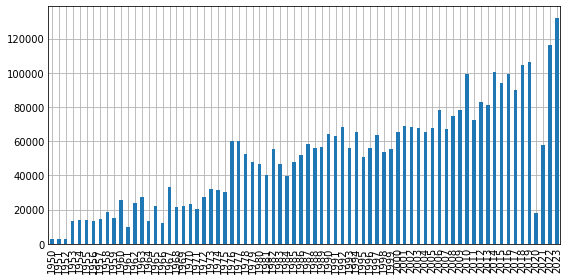

In [86]:
seasons_bezindy.plot.bar()

In [87]:
seas2023 = gps[gps["year"] == 2023].sort_values(by="date")
seas2023 = dict(seas2023[["location","coordinates"]].values)
seas2023

{'Sakhir': (26.0325, 50.5106),
 'Jeddah': (21.6319, 39.1044),
 'Melbourne': (-37.8497, 144.968),
 'Baku': (40.3725, 49.8533),
 'Miami': (25.9581, -80.2389),
 'Imola': (44.3439, 11.7167),
 'Monte-Carlo': (43.7347, 7.42056),
 'Montmeló': (41.57, 2.26111),
 'Montreal': (45.5, -73.5228),
 'Spielberg': (47.2197, 14.7647),
 'Silverstone': (52.0786, -1.01694),
 'Budapest': (47.5789, 19.2486),
 'Spa': (50.4372, 5.97139),
 'Zandvoort': (52.3888, 4.54092),
 'Monza': (45.6156, 9.28111),
 'Marina Bay': (1.2914, 103.864),
 'Suzuka': (34.8431, 136.541),
 'Al Daayen': (25.49, 51.4542),
 'Austin': (30.1328, -97.6411),
 'Mexico City': (19.4042, -99.0907),
 'São Paulo': (-23.7036, -46.6997),
 'Nevada': (36.1162, -115.174),
 'Abu Dhabi': (24.4672, 54.6031)}

In [88]:
trasyavzdalenosti = {}
with open(os.path.join("iROZHLAS.cz_extras", "prelety.txt"), encoding="utf-8") as prelety:
    #Read the file
    prelety = prelety.read()
    prelety = prelety.splitlines()
    for p in prelety:
        if ":" in p:
            trasa = p.split(":")[0]
            vzdalenost = p.split(":")[1]
            vzdalenost = vzdalenost.replace(" km","")
            trasyavzdalenosti[trasa] = vzdalenost
trasyavzdalenosti = pd.Series(trasyavzdalenosti)
trasyavzdalenosti = pd.to_numeric(trasyavzdalenosti)
trasyavzdalenosti.sort_values(ascending = False).head(20)

Total                                     132165
São Paulo → Okayama                        18765
Suzuka → São Paulo                         18737
São Paulo → Suzuka                         18737
Yeongam County → São Paulo                 18619
Shanghai → São Paulo                       18553
Midrand → California                       16666
Melbourne → Imola                          16086
Kuala Lumpur → São Paulo                   15901
Midrand → Mexico City                      14581
Mexico City → Eastern Cape Province        14570
Mexico City → Adelaide                     14133
New York State → Eastern Cape Province     13533
Abu Dhabi → Austin                         13260
Nevada → Abu Dhabi                         13193
Melbourne → São Paulo                      13062
Al Daayen → Austin                         13008
Melbourne → Baku                           12989
Jeddah → Melbourne                         12817
Abu Dhabi → São Paulo                      12149
dtype: int64

In [89]:
def shortestSeason(year):
    print("SEZÓNA " + str(year))
    season = gps[gps["year"] == year]
    season = season.sort_values(by="date")
    season = dict(season[["location","coordinates"]].values)
    gp = list(season)[-1]
    visited = [gp]
    unvisited = list(season)
    travelled = 0
    while len(unvisited) > 0:
        print(gp)
        unvisited.remove(gp)
        distances = {}
        for x in unvisited:
            distances[x] = great_circle(season[gp], season[x]).km
        if len(unvisited) > 0:
            nearest = min(distances, key=distances.get)
            trip = min(distances.values())
            print(trip)
            travelled = travelled + trip
            gp = nearest
        visited.append(gp)
    print("Total: " + str(travelled))
    return(travelled)

In [90]:
shortestSeason(2023)

SEZÓNA 2023
Abu Dhabi
337.13978455267335
Al Daayen
112.1078754621319
Sakhir
1258.4316161605182
Jeddah
2317.6754938714294
Baku
2557.3830028672296
Budapest
339.7929180158493
Spielberg
397.576857857257
Imola
238.08881318353068
Monza
255.68921411269275
Monte-Carlo
485.64197999305617
Montmeló
1026.4459032135776
Spa
238.59770365901835
Zandvoort
379.96668703494197
Silverstone
5137.220334715395
Montreal
2253.884959923878
Miami
1767.694389749965
Austin
1201.8694044190045
Mexico City
2433.399457020693
Nevada
9185.03488143608
Suzuka
5035.985835888524
Marina Bay
6057.689998756802
Melbourne
13062.929322051323
São Paulo
Total: 56080.24643394557


56080.24643394557

In [91]:
seasons_ideal_distance = {}
for x in range(1950,2024):
    seasons_ideal_distance[x] = shortestSeason(x)
seasons_ideal_distance = pd.Series(seasons_ideal_distance)

SEZÓNA 1950
Monza
207.74073065131412
Bern
358.5181388255363
Monte-Carlo
669.170957605762
Reims
196.74073658816573
Spa
519.1639158586127
Silverstone
6340.938707685032
Indianapolis
Total: 8292.273187214423
SEZÓNA 1951
Barcelona
744.229088592971
Monza
207.74073065131412
Bern
362.6461317311098
Reims
196.74073658816573
Spa
70.12050438963063
Nürburg
587.3453458619923
Silverstone
6340.938707685032
Indianapolis
Total: 8509.761245500216
SEZÓNA 1952
Monza
207.74073065131412
Bern
376.95170652893097
Nürburg
70.1205043896307
Spa
238.59770365901835
Zandvoort
379.96668703494197
Silverstone
337.06534319385685
Rouen
6601.012503245048
Indianapolis
Total: 8211.455178702741
SEZÓNA 1953
Monza
207.74073065131412
Bern
362.6461317311098
Reims
196.74073658816573
Spa
70.12050438963063
Nürburg
282.88231615263277
Zandvoort
379.96668703494197
Silverstone
6340.938707685032
Indianapolis
8759.594983918112
Buenos Aires
Total: 16600.630798150938
SEZÓNA 1954
Barcelona
744.229088592971
Monza
207.74073065131412
Bern
362.6

Midrand
7147.239475060614
Rio de Janeiro
8201.350191297934
Montreal
839.190010290547
Detroit
3112.3001161708294
California
8628.07699842722
Silverstone
119.22482318231083
Kent
315.2452671669088
Zandvoort
238.5977036590184
Spa
223.0776277152469
Hockenheim
416.25924756925315
Monza
238.08881318353068
Imola
349.98105930394865
Monte-Carlo
141.99441408836176
Le Castellet
828.945048223767
Spielberg
Total: 30799.570795339492
SEZÓNA 1984
Estoril
1501.0516795123806
Dijon
348.0540450103308
Hockenheim
161.33470007530676
Nürburg
139.58040656040512
Heusden-Zolder
163.24454455158252
Zandvoort
315.2452671669087
Kent
920.3248097299693
Monza
238.08881318353068
Imola
349.98105930394865
Monte-Carlo
690.9521228020778
Spielberg
6390.494521263612
Montreal
839.190010290547
Detroit
1605.8403629678696
Dallas
8393.779896467735
Rio de Janeiro
7147.239475060614
Midrand
Total: 29204.40171394682
SEZÓNA 1985
Adelaide
10056.551580845864
Midrand
7147.239475060614
Rio de Janeiro
7723.164328265712
Estoril
1366.6015445466

3777.3890581901273
Shanghai
1477.813806604127
Suzuka
Total: 48821.12298930302
SEZÓNA 2018
Abu Dhabi
446.84226402148636
Sakhir
1595.6958167471055
Baku
885.1261785292968
Sochi
1673.891842100012
Budapest
339.7929180158493
Spielberg
456.5037392392502
Monza
255.68921411269275
Monte-Carlo
141.99441408836176
Le Castellet
344.82647374562805
Montmeló
992.1581671847806
Hockenheim
223.07762771524708
Spa
519.1639158586127
Silverstone
5137.220334715395
Montreal
2703.189984986743
Austin
1201.8694044190045
Mexico City
7430.982151297702
São Paulo
13062.929322051323
Melbourne
6057.689998756802
Marina Bay
3806.8123702213975
Shanghai
1477.813806604127
Suzuka
Total: 48753.26994441082
SEZÓNA 2019
Abu Dhabi
446.84226402148636
Sakhir
1595.6958167471055
Baku
885.1261785292968
Sochi
1673.891842100012
Budapest
339.7929180158493
Spielberg
456.5037392392502
Monza
255.68921411269275
Monte-Carlo
141.99441408836176
Le Castellet
344.82647374562805
Montmeló
992.1581671847806
Hockenheim
223.07762771524708
Spa
519.16391

<AxesSubplot:>

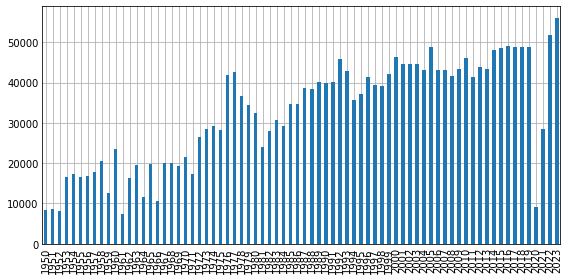

In [92]:
seasons_ideal_distance.plot.bar()

Jak moc „plýtvavý“ kalendář je – kolikrát víc je nutné nacestovat mezi okruhy, než kdyby se cestovalo vždy hned na ten nejbližší. Před rokem 1960 tohle srovnání nedává moc smysl (do seriálu MS patřilo 500 mil Indianopolis, na které ale Evropané necestovali), pak mi to ale přijde zajímavý.

In [93]:
podil_proti_idealu = (seasons_distance / seasons_ideal_distance)

<AxesSubplot:>

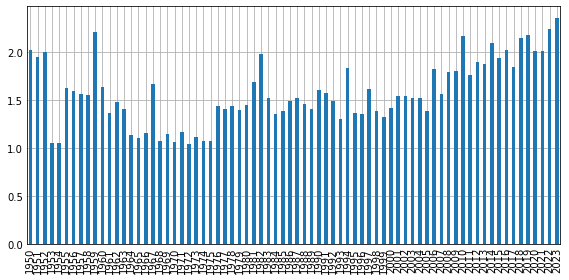

In [94]:
podil_proti_idealu.plot.bar()

In [95]:
(seasons_distance / seasons_ideal_distance).nlargest(5)

2023    2.356718
2022    2.238104
1959    2.212904
2019    2.176686
2010    2.161056
dtype: float64

## Graf2

In [96]:
graf2 = pd.DataFrame([seasons_distance,podil_proti_idealu]).transpose().set_axis(['Celková vzdálenost od prvního do posledního závodu mistrovství světa Formule 1','Nacestovaná vzdálenost ve srovnání s přejížděním vždy na nejbližší okruh až do reálného dějiště posledního závodu sezóny'], axis=1, inplace=False)
graf2

,Celková vzdálenost od prvního do posledního závodu mistrovství světa Formule 1,Nacestovaná vzdálenost ve srovnání s přejížděním vždy na nejbližší okruh až do reálného dějiště posledního závodu sezóny
1950,16767.314637,2.022041
1951,16550.631085,1.944900
1952,16412.887905,1.998779
1953,17502.808883,1.054346
1954,18198.408234,1.053798
...,...,...
2019,106120.564348,2.176686
2020,18098.210082,2.006026
2021,57464.041041,2.014535
2022,116138.738318,2.238104


In [97]:
graf2.to_csv("graf2.csv")

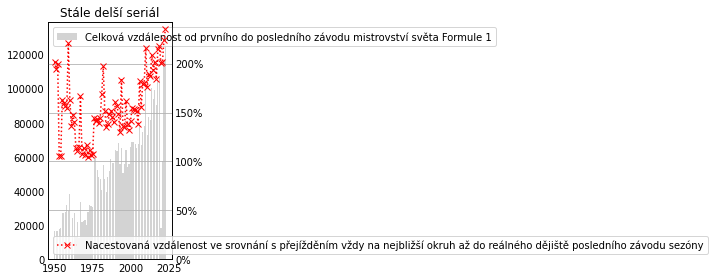

In [98]:
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8, 8]
plt.bar(years, seasons_distance, color = "lightgrey", label="Celková vzdálenost od prvního do posledního závodu mistrovství světa Formule 1")
plt.title("Stále delší seriál")
plt.legend()
plt.legend(loc = "upper left")
ax2=ax.twinx()
xticks = mtick.PercentFormatter(1)
ax2.yaxis.set_major_formatter(xticks)
ax2.plot(podil_proti_idealu, marker="x", linestyle="dotted", color = "red", label="Nacestovaná vzdálenost ve srovnání s přejížděním vždy na nejbližší okruh až do reálného dějiště posledního závodu sezóny")
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.legend()
plt.legend(loc = "lower left")
ax.grid(axis="both", which="both")
plt.savefig("graf2.svg",  bbox_inches='tight')
plt.show()

In [99]:
years_filtered = [x for x in range(1984,2024)]

In [100]:
podil_proti_idealu_fitered = podil_proti_idealu[podil_proti_idealu.index.isin(years_filtered)]

In [101]:
seasons_distance_filtered = seasons_distance[seasons_distance.index.isin(years_filtered)]

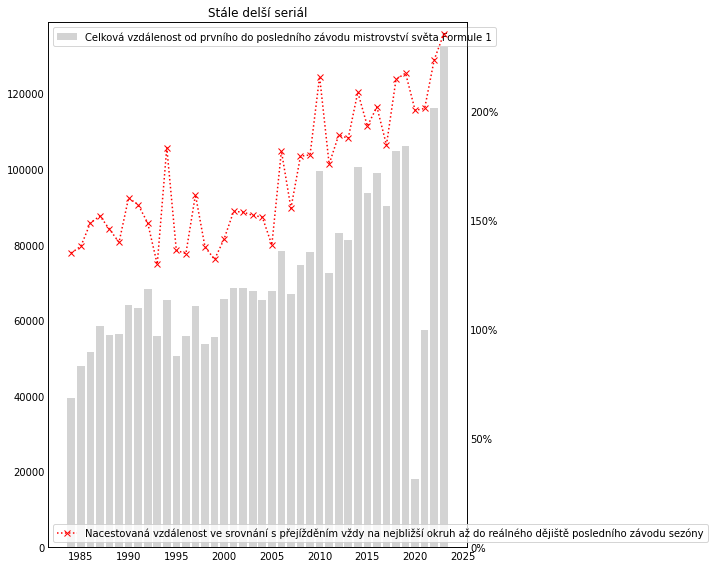

In [102]:
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8, 8]
plt.bar(years_filtered, seasons_distance_filtered, color = "lightgrey", label="Celková vzdálenost od prvního do posledního závodu mistrovství světa Formule 1")
plt.title("Stále delší seriál")
plt.legend()
plt.legend(loc = "upper left")
ax2=ax.twinx()
xticks = mtick.PercentFormatter(1)
ax2.yaxis.set_major_formatter(xticks)
ax2.plot(podil_proti_idealu_fitered, marker="x", linestyle="dotted", color = "red", label="Nacestovaná vzdálenost ve srovnání s přejížděním vždy na nejbližší okruh až do reálného dějiště posledního závodu sezóny")
ax.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.legend()
plt.legend(loc = "lower left")
ax.grid(axis="both", which="both")
ax2.grid(axis="both", which="both")
plt.show()

In [103]:
seasons_distance_filtered_rounded = []
for x in seasons_distance_filtered:
    seasons_distance_filtered_rounded.append(int(round(x, 0)))

In [104]:
seasons_distance_filtered_rounded

[39465,
 47965,
 51619,
 58620,
 56194,
 56341,
 64163,
 63186,
 68203,
 55846,
 65441,
 50578,
 55931,
 63834,
 53832,
 55627,
 65545,
 68645,
 68502,
 67829,
 65337,
 67786,
 78453,
 67030,
 74634,
 77986,
 99436,
 72618,
 83156,
 81315,
 100574,
 93769,
 99070,
 90152,
 104697,
 106121,
 18098,
 57464,
 116139,
 132165]

In [105]:
podil_proti_idealu_fitered_rounded = []
for x in podil_proti_idealu_fitered:
    podil_proti_idealu_fitered_rounded.append(int(round(x,2) * 100))

In [106]:
print(', '.join(str(x) for x in podil_proti_idealu_fitered_rounded))

135, 138, 149, 152, 146, 140, 160, 157, 149, 130, 184, 136, 135, 162, 138, 132, 142, 154, 154, 152, 152, 139, 182, 156, 180, 180, 216, 176, 189, 188, 209, 193, 202, 185, 215, 218, 200, 200, 224, 236


## (Ne)svoboda

In [107]:
hfi = pd.read_csv(os.path.join("dataCato", "human-freedom-index-2022.csv"), index_col=False)

In [108]:
countr_hfi = hfi["countries"].to_list()

In [109]:
countr_gps = gps["country"].drop_duplicates().to_list()

In [110]:
for x in countr_gps:
    if x not in countr_hfi:
        print(x)

UK
Monaco
USA
UAE
Korea
Russia


In [111]:
prejmenovani = {
    "UK": "United Kingdom",
    "USA": "United States",
    "UAE": "United Arab Emirates",
    "Russia": "Russian Federation",
    "Korea": "Korea, Rep."
}

In [112]:
gps = gps.replace({"country": prejmenovani})

In [113]:
hfi = hfi.rename(columns={"countries":"country"})
# hfi = hfi.rename(columns={"year":"hfi_year"})

In [114]:
hfi.columns

Index(['year', 'country', 'region', 'hf_score', 'hf_rank', 'hf_quartile',
       'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol_vdem',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_burden',
       'ef_regulation_business_start', 'ef_regulation_business_impartial',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=141)

In [115]:
hfi21 = hfi[hfi["year"] == 2020]
hfi21["year"] = 2021
hfi22 = hfi[hfi["year"] == 2020]
hfi22["year"] = 2022
hfi23 = hfi[hfi["year"] == 2020]
hfi23["year"] = 2023

C:\Users\micha\AppData\Local\Temp\ipykernel_22412\13472544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi21["year"] = 2021
C:\Users\micha\AppData\Local\Temp\ipykernel_22412\13472544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi22["year"] = 2022
C:\Users\micha\AppData\Local\Temp\ipykernel_22412\13472544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [116]:
hfi = hfi.append(hfi21)
hfi = hfi.append(hfi22)
hfi = hfi.append(hfi23)

C:\Users\micha\AppData\Local\Temp\ipykernel_22412\1230541456.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hfi = hfi.append(hfi21)
C:\Users\micha\AppData\Local\Temp\ipykernel_22412\1230541456.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hfi = hfi.append(hfi22)
C:\Users\micha\AppData\Local\Temp\ipykernel_22412\1230541456.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hfi = hfi.append(hfi23)


In [117]:
hfi[hfi["year"] == 2023].sort_values(by="hf_rank").tail(15)

,year,country,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
164,2023,Zimbabwe,Sub-Saharan Africa,5.25,151.0,4.0,2.560446,4.603335,3.658217,4.870360,...,2.405815,2.666667,8.330912,3.3300,7.993307,7.287343,5.335674,6.080774,4.48,163.0
32,2023,China,East Asia,5.22,152.0,4.0,3.314708,5.184793,4.471637,3.763093,...,5.630297,3.555556,9.714704,3.6925,9.106129,8.453113,6.692050,6.242201,6.27,116.0
30,2023,Chad,Sub-Saharan Africa,5.20,153.0,4.0,NaN,NaN,NaN,4.106767,...,3.638854,0.888889,6.281689,0.9525,7.199007,0.651422,3.268727,5.325098,5.55,152.0
1,2023,Algeria,Middle East & North Africa,5.13,154.0,4.0,4.913311,5.503872,4.254187,5.461189,...,4.215154,2.222222,9.305002,2.5775,8.771111,7.029528,5.686753,5.778953,5.12,157.0
89,2023,Libya,Middle East & North Africa,4.95,155.0,4.0,NaN,NaN,NaN,2.910724,...,4.717342,0.000000,8.522657,0.7675,NaN,0.034909,2.808481,5.386211,4.95,160.0
24,2023,Burundi,Sub-Saharan Africa,4.82,156.0,4.0,NaN,NaN,NaN,3.442351,...,4.911348,2.444444,9.710712,3.5500,9.756138,7.399436,6.295347,6.449835,5.67,147.0
72,2023,Iraq,Middle East & North Africa,4.77,157.0,4.0,NaN,NaN,NaN,4.063050,...,5.150570,0.000000,8.744443,1.6650,8.195023,6.502690,5.042954,6.892384,5.51,153.0
136,2023,Somalia,Sub-Saharan Africa,4.67,158.0,4.0,NaN,NaN,NaN,3.229134,...,NaN,0.000000,5.676858,1.9625,NaN,NaN,2.546453,5.087883,6.03,130.0
128,2023,Saudi Arabia,Middle East & North Africa,4.56,159.0,4.0,NaN,NaN,NaN,3.561250,...,6.126119,4.444444,9.607102,3.8125,9.285174,8.834230,7.018262,6.987400,6.78,86.0
140,2023,Sudan,Sub-Saharan Africa,4.31,160.0,4.0,2.577389,3.986437,3.729939,4.130789,...,3.686703,3.555556,8.708450,4.3375,6.755216,7.982321,5.837624,4.765301,4.21,164.0


In [118]:
gps = gps.merge(hfi, on=["country","year"], how = "left")

In [119]:
gps

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,1950,1,833,1950-05-13,Silverstone,United Kingdom,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,5,829,1951-07-14,Silverstone,United Kingdom,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,5,821,1952-07-19,Silverstone,United Kingdom,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,6,813,1953-07-18,Silverstone,United Kingdom,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,5,803,1954-07-17,Silverstone,United Kingdom,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2021,21,1072,2021-12-05,Jeddah,Saudi Arabia,True,True,True,False,...,6.126119,4.444444,9.607102,3.8125,9.285174,8.834230,7.018262,6.987400,6.78,86.0
1113,2022,2,1075,2022-03-27,Jeddah,Saudi Arabia,True,True,True,False,...,6.126119,4.444444,9.607102,3.8125,9.285174,8.834230,7.018262,6.987400,6.78,86.0
1114,2023,2,1098,2023-03-19,Jeddah,Saudi Arabia,True,True,True,False,...,6.126119,4.444444,9.607102,3.8125,9.285174,8.834230,7.018262,6.987400,6.78,86.0
1115,2022,5,1078,2022-05-08,Miami,United States,True,False,False,False,...,5.773777,6.888889,9.855026,8.0775,9.603840,8.038368,8.039567,8.109914,7.97,7.0


In [120]:
gpslm = gps[gps["year"] >= 2017]

In [121]:
gpslm.groupby("year")["hf_score"].mean()

year
2017    7.541053
2018    7.678500
2019    7.668500
2020    7.395882
2021    7.124762
2022    7.476667
2023    7.416818
Name: hf_score, dtype: float64

<AxesSubplot:xlabel='year'>

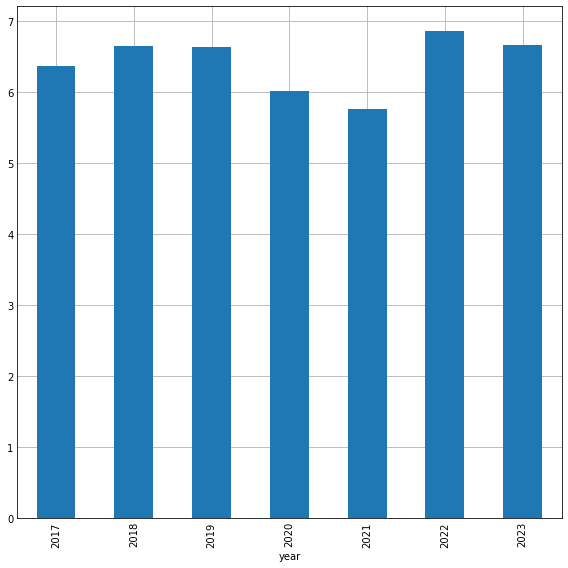

In [122]:
gpslm.groupby("year")["hf_score"].quantile(q=0.25).plot.bar()

<AxesSubplot:xlabel='year'>

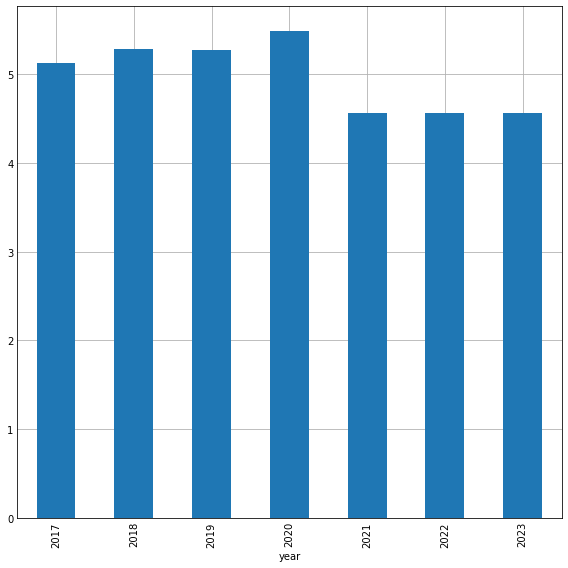

In [123]:
gpslm.groupby("year")["hf_score"].min().plot.bar()

In [124]:
gps.groupby(["country"])["hf_rank"].max().nlargest(10)

country
Saudi Arabia            159.0
China                   153.0
Bahrain                 150.0
Azerbaijan              131.0
United Arab Emirates    131.0
Turkey                  130.0
Qatar                   129.0
Russian Federation      124.0
Malaysia                113.0
Mexico                   98.0
Name: hf_rank, dtype: float64

Kolikátá v celkovém pořadí států na zemi co do dodržování lidských práv je nejhorší pořadatelská země.

<AxesSubplot:xlabel='year'>

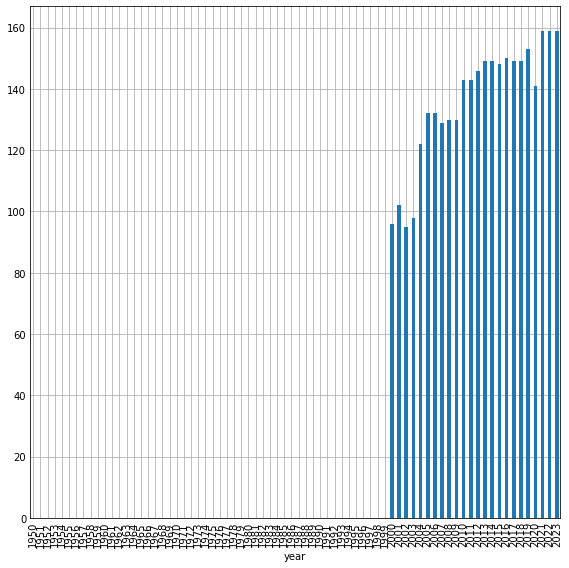

In [125]:
gps.groupby(["year"])["hf_rank"].max().plot.bar()

Kolik zemí v seriálu je stejně špatných nebo horších než nejhorší země před 20 lety.

<AxesSubplot:xlabel='year'>

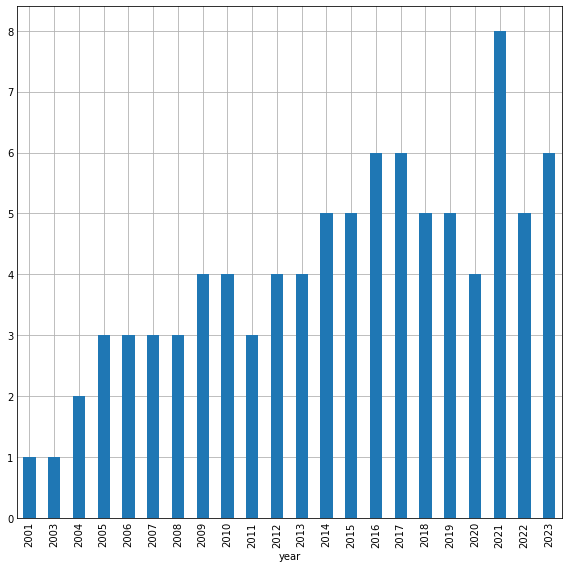

In [126]:
gps[gps["hf_rank"] >= 98].groupby("year")["country"].nunique().plot.bar()

In [127]:
gps[gps["year"] == 2003].groupby("country")["hf_rank"].median().nlargest(10)

country
Malaysia    98.0
Brazil      59.0
Hungary     27.0
Italy       26.0
France      23.0
Spain       21.0
Germany     20.0
Japan       17.0
Austria     16.0
Canada      13.0
Name: hf_rank, dtype: float64

In [128]:
gps[gps["year"] == 2023].groupby("country")["hf_rank"].median().nlargest(10)

country
Saudi Arabia            159.0
Bahrain                 141.0
Azerbaijan              131.0
Qatar                   129.0
United Arab Emirates    127.0
Mexico                   98.0
Brazil                   80.0
Hungary                  67.0
Singapore                44.0
Italy                    33.0
Name: hf_rank, dtype: float64

In [129]:
gps.groupby(["year"])["pf_rank"].max()

year
1950      NaN
1951      NaN
1952      NaN
1953      NaN
1954      NaN
        ...  
2019    159.0
2020    159.0
2021    163.0
2022    163.0
2023    163.0
Name: pf_rank, Length: 74, dtype: float64

In [130]:
hfi[(hfi["year"] == 2023) & (hfi["pf_rank"] > 160)]

,year,country,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,...,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
46,2023,"Egypt, Arab Rep.",Middle East & North Africa,4.28,161.0,4.0,2.089068,3.747611,3.398598,4.225160,...,4.030268,4.000000,9.386553,2.2875,8.095328,5.852549,5.608700,5.268932,5.61,150.0
128,2023,Saudi Arabia,Middle East & North Africa,4.56,159.0,4.0,NaN,NaN,NaN,3.561250,...,6.126119,4.444444,9.607102,3.8125,9.285174,8.834230,7.018262,6.987400,6.78,86.0
136,2023,Somalia,Sub-Saharan Africa,4.67,158.0,4.0,NaN,NaN,NaN,3.229134,...,NaN,0.000000,5.676858,1.9625,NaN,NaN,2.546453,5.087883,6.03,130.0
144,2023,Syrian Arab Republic,Middle East & North Africa,3.30,165.0,4.0,NaN,NaN,NaN,2.515244,...,NaN,0.000000,9.129166,1.1675,NaN,6.233666,4.132583,5.175445,4.63,162.0
162,2023,"Yemen, Rep.",Middle East & North Africa,3.94,164.0,4.0,NaN,NaN,NaN,2.336345,...,2.943248,0.000000,8.281051,2.1625,NaN,7.220087,4.121377,3.584140,5.67,147.0


<AxesSubplot:xlabel='year'>

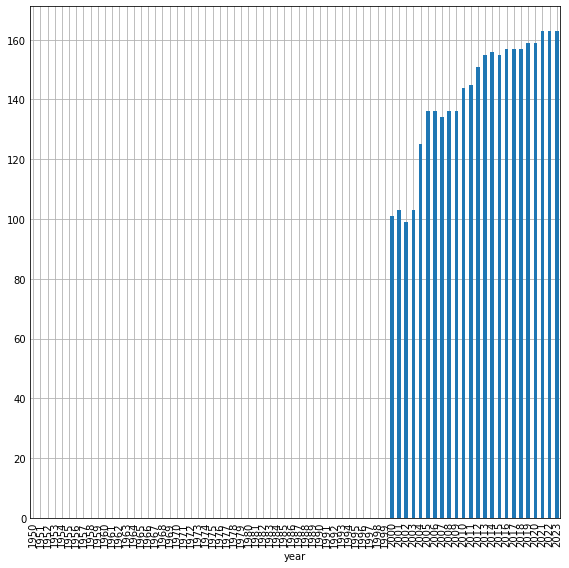

In [131]:
gps.groupby(["year"])["pf_rank"].max().plot.bar()

In [132]:
gps.groupby("country")["hf_rank"].max().nlargest(40)

country
Saudi Arabia            159.0
China                   153.0
Bahrain                 150.0
Azerbaijan              131.0
United Arab Emirates    131.0
Turkey                  130.0
Qatar                   129.0
Russian Federation      124.0
Malaysia                113.0
Mexico                   98.0
India                    94.0
Brazil                   80.0
Hungary                  67.0
Singapore                53.0
France                   42.0
Korea, Rep.              39.0
Italy                    33.0
Spain                    31.0
Belgium                  29.0
Portugal                 24.0
United States            23.0
Austria                  22.0
Japan                    22.0
Germany                  20.0
United Kingdom           20.0
Canada                   13.0
Australia                11.0
Netherlands               9.0
Argentina                 NaN
Monaco                    NaN
Morocco                   NaN
South Africa              NaN
Sweden                    NaN
Sw

<AxesSubplot:xlabel='year'>

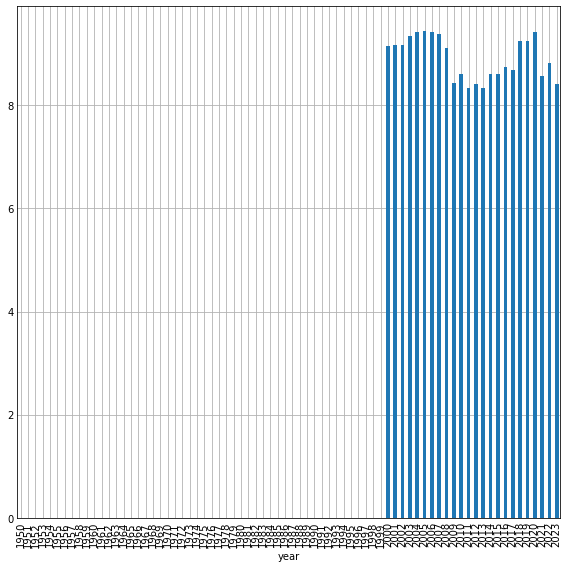

In [133]:
gps.groupby(["year"])["pf_identity_same"].mean().plot.bar()

## Tresty smrti

In [134]:
gps["deathPenalty"] = False

In [135]:
DPAbolition = {
    'United Kingdom': 1998,
    'Monaco': 1962,
    'United States': "nan",
    'Switzerland': 1992,
    'Belgium': 1996,
    'France': 1981,
    'Italy': 1994,
    'Germany': 1949,
    'Spain': 1995,
    'Netherlands': 1982,
    'Argentina': 2009,
    'Portugal': 1976,
    'Morocco': "nan",
    'South Africa': 1995,
    'Mexico': 2005,
    'Austria': 1968, 
    'Canada': 1999,
    'Brazil': "nan",
    'Sweden': 1973,
    'Japan': "nan",
    'Australia': 1985,
    'Hungary': 1990,
    'Malaysia': "nan",
    'Bahrain': "nan",
    'China': "nan",
    'Turkey': 2004,
    'Singapore': "nan",
    'United Arab Emirates': "nan",
    'Korea, Rep.': "nan",
    'India': "nan",
    'Russian Federation': "nan",
    'Azerbaijan': 1998,
    'Qatar': "nan",
    'Saudi Arabia': "nan"    
}
DPAbolition = pd.DataFrame.from_dict(DPAbolition, orient="index", columns=["year_of_abolition"])
DPAbolition["country"] = DPAbolition.index
DPAbolition

,year_of_abolition,country
United Kingdom,1998,United Kingdom
Monaco,1962,Monaco
United States,nan,United States
Switzerland,1992,Switzerland
Belgium,1996,Belgium
France,1981,France
Italy,1994,Italy
Germany,1949,Germany
Spain,1995,Spain
Netherlands,1982,Netherlands


In [136]:
gps = gps.merge(DPAbolition, on="country", how="left")

In [137]:
gps.loc[gps["year_of_abolition"] == "nan", "year_of_abolition"]=2024

In [138]:
gps.loc[gps["year"] <= gps["year_of_abolition"],"deathPenalty"]=True

<AxesSubplot:xlabel='year'>

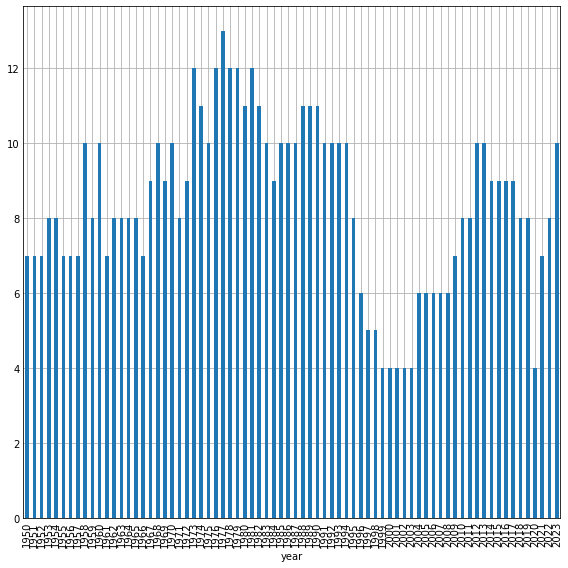

In [139]:
gps[gps["deathPenalty"] == True].groupby("year")["raceId"].nunique().plot.bar()

In [140]:
DPLast = {
    'United Kingdom': 1964,
    'Monaco': 1847,
    'United States': 2023,
    'Switzerland': 1944,
    'Belgium': 1950,
    'France': 1977,
    'Italy': 1947,
    'Germany': 1951,
    'Spain': 1975,
    'Netherlands': 1952,
    'Argentina': 1956,
    'Portugal': 1917,
    'Morocco': 1993,
    'South Africa': 1989,
    'Mexico': 1961,
    'Austria': 1950, 
    'Canada': 1962,
    'Brazil': 1876,
    'Sweden': 1910,
    'Japan': 2022,
    'Australia': 1967,
    'Hungary': 1988,
    'Malaysia': 2017,
    'Bahrain': 2019,
    'China': 2022,
    'Turkey': 1984,
    'Singapore': 2022,
    'United Arab Emirates': 2021,
    'Korea, Rep.': 1997,
    'India': 2020,
    'Russian Federation': 1999,
    'Azerbaijan': 1993,
    'Qatar': 2020,
    'Saudi Arabia': 2022    
}
DPLast = pd.DataFrame.from_dict(DPLast, orient="index", columns=["year_of_last_execution"])
DPLast["country"] = DPLast.index
DPLast

,year_of_last_execution,country
United Kingdom,1964,United Kingdom
Monaco,1847,Monaco
United States,2023,United States
Switzerland,1944,Switzerland
Belgium,1950,Belgium
France,1977,France
Italy,1947,Italy
Germany,1951,Germany
Spain,1975,Spain
Netherlands,1952,Netherlands


In [141]:
gps["executing"] = False

In [142]:
gps = gps.merge(DPLast, on="country", how="left")

In [143]:
gps.loc[gps["year"] <= (gps["year_of_last_execution"] + 3),"executing"]=True

<AxesSubplot:xlabel='year'>

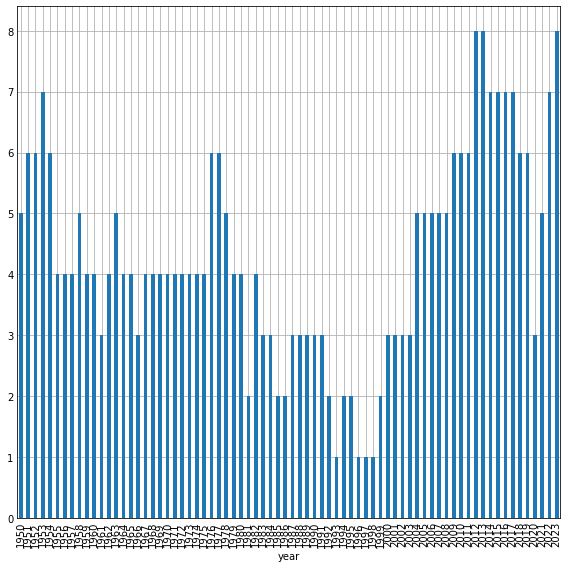

In [144]:
gps[gps["executing"] == True].groupby("year")["raceId"].nunique().plot.bar()

In [145]:
gps[(gps["executing"] == True) & (gps["year"] == 1996)]

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,...,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,deathPenalty,year_of_abolition,executing,year_of_last_execution
869,1996,16,239,1996-10-13,Suzuka,Japan,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2024,True,2022


In [146]:
gaydecrim = {
    'United Kingdom': 1967,
    'Monaco': 1793,
    'United States': 2003,
    'Switzerland': 1942,
    'Belgium': 1795,
    'France': 1791,
    'Italy': 1890,
    'Germany': 1969,
    'Spain': 1979,
    'Netherlands': 1811,
    'Argentina': 1887,
    'Portugal': 1983,
    'Morocco': 2024,
    'South Africa': 1998,
    'Mexico': 1871,
    'Austria': 1971, 
    'Canada': 1969,
    'Brazil': 1831,
    'Sweden': 1944,
    'Japan': 1880,
    'Australia': 1997,
    'Hungary': 1962,
    'Malaysia': 2024,
    'Bahrain': 1976,
    'China': 1997,
    'Turkey': 1858,
    'Singapore': 2022,
    'United Arab Emirates': 2024,
    'Korea, Rep.': 0,
    'India': 2018,
    'Russian Federation': 1993,
    'Azerbaijan': 2000,
    'Qatar': 2024,
    'Saudi Arabia': 2024    
}
gaydecrim = pd.DataFrame.from_dict(gaydecrim, orient="index", columns=["decriminalisation_of_same-sex_sexual_activity"])
gaydecrim["country"] = gaydecrim.index
gaydecrim

,decriminalisation_of_same-sex_sexual_activity,country
United Kingdom,1967,United Kingdom
Monaco,1793,Monaco
United States,2003,United States
Switzerland,1942,Switzerland
Belgium,1795,Belgium
France,1791,France
Italy,1890,Italy
Germany,1969,Germany
Spain,1979,Spain
Netherlands,1811,Netherlands


In [147]:
gps = gps.merge(gaydecrim, on="country", how="left")

In [148]:
gps["same_sex_criminal"] = False

In [149]:
gps.loc[gps["year"] < (gps["decriminalisation_of_same-sex_sexual_activity"]),"same_sex_criminal"]=True

In [150]:
gps[(gps["same_sex_criminal"] == True) & (gps["year"] == 1994)]

,year,round,raceId,date,location,country,street,tilkedrome,night,westernEurope,...,ef_regulation_business,ef_regulation,ef_score,ef_rank,deathPenalty,year_of_abolition,executing,year_of_last_execution,decriminalisation_of_same-sex_sexual_activity,same_sex_criminal
813,1994,16,272,1994-11-13,Adelaide,Australia,True,False,False,False,...,NaN,NaN,NaN,NaN,False,1985,False,1967,1997,True


<AxesSubplot:xlabel='year'>

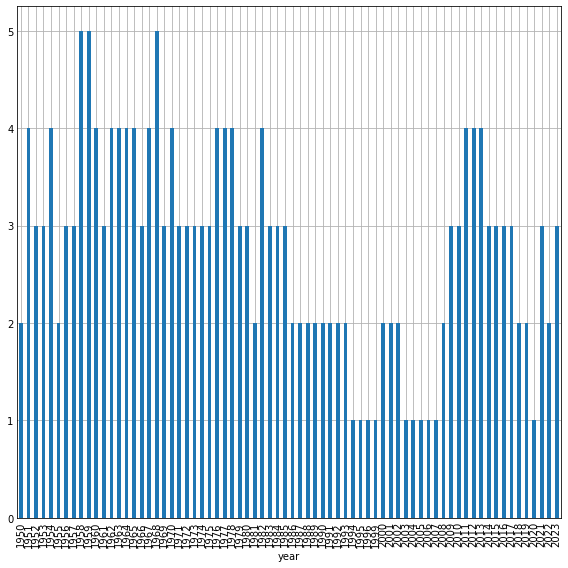

In [151]:
gps[gps["same_sex_criminal"] == True].groupby("year")["raceId"].nunique().plot.bar()

### Časy

In [152]:
races["hodina_zacatku"] = pd.to_datetime(races["time"], errors="coerce")

In [153]:
races.groupby(["gp","year"])["hodina_zacatku"].max().nlargest(15)

gp                        year
Mexico City Grand Prix    2022   2023-02-24 20:00:00
United States Grand Prix  2014   2023-02-24 20:00:00
Miami Grand Prix          2022   2023-02-24 19:30:00
Mexican Grand Prix        2018   2023-02-24 19:10:00
                          2019   2023-02-24 19:10:00
United States Grand Prix  2019   2023-02-24 19:10:00
Mexican Grand Prix        2015   2023-02-24 19:00:00
                          2016   2023-02-24 19:00:00
                          2017   2023-02-24 19:00:00
Mexico City Grand Prix    2021   2023-02-24 19:00:00
United States Grand Prix  2012   2023-02-24 19:00:00
                          2013   2023-02-24 19:00:00
                          2015   2023-02-24 19:00:00
                          2016   2023-02-24 19:00:00
                          2017   2023-02-24 19:00:00
Name: hodina_zacatku, dtype: datetime64[ns]

In [154]:
races.groupby(["gp","year"])["hodina_zacatku"].min().nsmallest(15)

gp                     year
Australian Grand Prix  2007   2023-02-24 03:00:00
                       2008   2023-02-24 04:30:00
Japanese Grand Prix    2007   2023-02-24 04:30:00
                       2008   2023-02-24 04:30:00
Australian Grand Prix  2015   2023-02-24 05:00:00
                       2016   2023-02-24 05:00:00
                       2017   2023-02-24 05:00:00
                       2022   2023-02-24 05:00:00
Japanese Grand Prix    2009   2023-02-24 05:00:00
                       2015   2023-02-24 05:00:00
                       2016   2023-02-24 05:00:00
                       2017   2023-02-24 05:00:00
                       2022   2023-02-24 05:00:00
Korean Grand Prix      2010   2023-02-24 05:00:00
Australian Grand Prix  2018   2023-02-24 05:10:00
Name: hodina_zacatku, dtype: datetime64[ns]

## Sezona 1982

In [155]:
sezona1982_qualy = {
    "1982 South African Grand Prix": [4.104, "1:06.351", False],
    "1982 Brazilian Grand Prix": [5.031, "1:28.808", False],
    "1982 United States Grand Prix West": [3.428, "1:27.316", True],
    "1982 San Marino Grand Prix": [5.040, "1:29.765", False],
    "1982 Belgian Grand Prix": [4.262, "1:15.701", False],
    "1982 Monaco Grand Prix": [3.312, "1:23.281", True],
    "1982 Detroit Grand Prix": [4.168, "1:48.537", True],
    "1982 Canadian Grand Prix": [4.410, "1:27.509", True],
    "1982 Dutch Grand Prix": [4.252, "1:14.233", False],
    "1982 British Grand Prix": [4.207, "1:09.540", False],
    "1982 French Grand Prix": [5.809, "1:34.406", False],
    "1982 German Grand Prix": [6.802, "1:47.947", False],
    "1982 Austrian Grand Prix": [5.942, "1:27.612", False],
    "1982 Swiss Grand Prix": [3.801, "1:01.380", False],
    "1982 Italian Grand Prix": [5.800, "1:28.472", False],
    "1982 Caesars Palace Grand Prix": [3.650, "1:19.639", True]
}

In [156]:
sezona1982_fl = {
    "1982 South African Grand Prix": [4.104, "1:08.278", False],
    "1982 Brazilian Grand Prix": [5.031, "1:37.016", False],
    "1982 United States Grand Prix West": [3.428, "1:30.831", True],
    "1982 San Marino Grand Prix": [5.040, "1:35.036", False],
    "1982 Belgian Grand Prix": [4.262, "1:20.214", False],
    "1982 Monaco Grand Prix": [3.312, "1:26.354", True],
    "1982 Detroit Grand Prix": [4.168, "1:50.438", True],
    "1982 Canadian Grand Prix": [4.410, "1:28.323", True],
    "1982 Dutch Grand Prix": [4.252, "1:19.780", False],
    "1982 British Grand Prix": [4.207, "1:13.028", False],
    "1982 French Grand Prix": [5.809, "1:40.075", False],
    "1982 German Grand Prix": [6.802, "1:54.035", False],
    "1982 Austrian Grand Prix": [5.942, "1:33.699", False],
    "1982 Swiss Grand Prix": [3.801, "1:07.477", False],
    "1982 Italian Grand Prix": [5.800, "1:33.619", False],
    "1982 Caesars Palace Grand Prix": [3.650, "1:16.356", True]
}

In [157]:
sezona1982_qualy = pd.DataFrame.from_dict(sezona1982_qualy, orient="index", columns=["lenght", "time", "street"])

In [158]:
sezona1982_fl = pd.DataFrame.from_dict(sezona1982_fl, orient="index", columns=["lenght", "time", "street"])

In [159]:
def secondize(x):
    min = float(x.split(":")[0])
    sec = float(x.split(":")[1])
    seconds = (min * 60) + sec
    return seconds

In [160]:
sezona1982_qualy["seconds"] = sezona1982_qualy["time"].astype(str).apply(lambda x: secondize(x))
sezona1982_qualy["avgspeed"] = sezona1982_qualy["lenght"] / sezona1982_qualy["seconds"] * 3600
sezona1982_qualy.sort_values(by="avgspeed")

,lenght,time,street,seconds,avgspeed
1982 Detroit Grand Prix,4.168,1:48.537,True,108.537,138.245944
1982 United States Grand Prix West,3.428,1:27.316,True,87.316,141.334921
1982 Monaco Grand Prix,3.312,1:23.281,True,83.281,143.168310
1982 Caesars Palace Grand Prix,3.650,1:19.639,True,79.639,164.994538
1982 Canadian Grand Prix,4.410,1:27.509,True,87.509,181.421340
1982 San Marino Grand Prix,5.040,1:29.765,False,89.765,202.127778
1982 Belgian Grand Prix,4.262,1:15.701,False,75.701,202.681603
1982 Brazilian Grand Prix,5.031,1:28.808,False,88.808,203.941086
1982 Dutch Grand Prix,4.252,1:14.233,False,74.233,206.204788
1982 British Grand Prix,4.207,1:09.540,False,69.540,217.791199


In [161]:
sezona1982_fl["seconds"] = sezona1982_fl["time"].astype(str).apply(lambda x: secondize(x))
sezona1982_fl["avgspeed"] = sezona1982_fl["lenght"] / sezona1982_fl["seconds"] * 3600
sezona1982_fl.sort_values(by="avgspeed")

,lenght,time,street,seconds,avgspeed
1982 United States Grand Prix West,3.428,1:30.831,True,90.831,135.865508
1982 Detroit Grand Prix,4.168,1:50.438,True,110.438,135.866278
1982 Monaco Grand Prix,3.312,1:26.354,True,86.354,138.073511
1982 Caesars Palace Grand Prix,3.650,1:16.356,True,76.356,172.088637
1982 Canadian Grand Prix,4.410,1:28.323,True,88.323,179.749329
1982 Brazilian Grand Prix,5.031,1:37.016,False,97.016,186.686732
1982 San Marino Grand Prix,5.040,1:35.036,False,95.036,190.917126
1982 Belgian Grand Prix,4.262,1:20.214,False,80.214,191.278330
1982 Dutch Grand Prix,4.252,1:19.780,False,79.780,191.867636
1982 Swiss Grand Prix,3.801,1:07.477,False,67.477,202.789099


In [162]:
sezona1982_fl.groupby("street")["avgspeed"].mean()

street
False    205.667619
True     152.328653
Name: avgspeed, dtype: float64

In [163]:
sezona1982_qualy.groupby("street")["avgspeed"].mean()

street
False    218.806799
True     153.833010
Name: avgspeed, dtype: float64

In [164]:
205.667619-152.328653

53.338966

In [165]:
results[results["year"] == 2022].groupby(["location","street"])["fastestLapSpeed"].max().nlargest(25)

location      street
Monza         False     248.182
Jeddah        True      242.556
Melbourne     True      236.740
Silverstone   False     234.312
Spielberg     False     231.063
Spa           False     230.575
Imola         False     225.281
Le Castellet  False     219.575
Abu Dhabi     False     215.085
Miami         True      213.255
São Paulo     False     210.237
Zandvoort     False     208.173
Montreal      True      207.258
Sakhir        False     206.018
Baku          True      203.787
Austin        False     200.902
Suzuka        False     200.220
Montmeló      False     200.099
Budapest      False     193.787
Mexico City   False     193.310
Marina Bay    True      171.211
Monte-Carlo   True      160.834
Name: fastestLapSpeed, dtype: float64

In [166]:
results[results["year"] == 2022].groupby(["location","street"])["fastestLapSpeed"].max().groupby("street").mean()

street
False    214.454600
True     205.091571
Name: fastestLapSpeed, dtype: float64

In [167]:
results[results["year"] == 2022].groupby(["location","street"])["fastestLapSpeed"].max().groupby("street").median()

street
False    210.237
True     207.258
Name: fastestLapSpeed, dtype: float64

## Poslední závod

In [168]:
gps.sort_values(by="round").groupby("year")["location"].last().tail(25)

year
1999          Suzuka
2000    Kuala Lumpur
2001          Suzuka
2002          Suzuka
2003          Suzuka
2004       São Paulo
2005        Shanghai
2006       São Paulo
2007       São Paulo
2008       São Paulo
2009       Abu Dhabi
2010       Abu Dhabi
2011       São Paulo
2012       São Paulo
2013       São Paulo
2014       Abu Dhabi
2015       Abu Dhabi
2016       Abu Dhabi
2017       Abu Dhabi
2018       Abu Dhabi
2019       Abu Dhabi
2020       Abu Dhabi
2021       Abu Dhabi
2022       Abu Dhabi
2023       Abu Dhabi
Name: location, dtype: object

## Tabulky znovu jako JSON * 100

In [169]:
graf1["Podíl městských okruhů"] = graf1["Podíl městských okruhů"] * 100
graf1["Podíl závodů pod umělým osvětlením"] = graf1["Podíl závodů pod umělým osvětlením"] * 100
graf1.to_json("graf1.json", orient="split")
graf1.to_csv("graf1b.csv")

In [170]:
graf2["Nacestovaná vzdálenost ve srovnání s přejížděním vždy na nejbližší okruh až do reálného dějiště posledního závodu sezóny"] = graf2["Nacestovaná vzdálenost ve srovnání s přejížděním vždy na nejbližší okruh až do reálného dějiště posledního závodu sezóny"] * 100
graf2.to_json("graf2.json")
graf2.to_csv("graf2b.csv")

## Extras pro Radiožurnál Sport

In [19]:
results.groupby("name")["year"].nunique().nlargest(5)

name
Fernando Alonso       19
Kimi Räikkönen        19
Michael Schumacher    19
Rubens Barrichello    19
Graham Hill           18
Name: year, dtype: int64

In [20]:
delka_kariery = results.groupby("name")["date"].max() - results.groupby("name")["date"].min()

In [21]:
delka_kariery.nlargest()

name
Fernando Alonso      7931 days
Michael Schumacher   7763 days
Kimi Räikkönen       7588 days
Rubens Barrichello   6832 days
Jenson Button        6286 days
Name: date, dtype: timedelta64[ns]

In [22]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'time_y',
       'status', 'constructor', 'constructorNationality', 'constructorRef',
       'name', 'age', 'driverContinent', 'street', 'entries'],
      dtype='object')

In [24]:
dodebut = pd.Series(results.groupby("name")["date"].min(), name="dodebut")

In [26]:
results = results.merge(dodebut, on="name", how="left")

In [27]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'time_y',
       'status', 'constructor', 'constructorNationality', 'constructorRef',
       'name', 'age', 'driverContinent', 'street', 'entries', 'dodebut'],
      dtype='object')

In [45]:
age_of_the_youngest_on_the_debut_of_the_oldest = results.groupby("raceId")["dodebut"].min() - results.groupby("raceId")["dob"].max()

In [47]:
age_of_the_youngest_on_the_debut_of_the_oldest = pd.Series(age_of_the_youngest_on_the_debut_of_the_oldest, name="age_of_the_youngest_on_the_debut_of_the_oldest")

In [48]:
results = results.merge(age_of_the_youngest_on_the_debut_of_the_oldest, on="raceId", how="left")

In [53]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'time_y',
       'status', 'constructor', 'constructorNationality', 'constructorRef',
       'name', 'age', 'driverContinent', 'street', 'entries', 'dodebut',
       'age_of_the_youngest_on_the_debut_of_the_oldest_x',
       'age_of_the_youngest_on_the_debut_of_the_oldest_y'],
      dtype='object')

In [55]:
results.groupby(["year","location"])["age_of_the_youngest_on_the_debut_of_the_oldest_y"].max().nlargest(5)

year  location   
1950  Monza         11627 days
1951  Spa           11542 days
1950  Silverstone   10594 days
      Spa           10594 days
      Bern          10545 days
Name: age_of_the_youngest_on_the_debut_of_the_oldest_y, dtype: timedelta64[ns]

In [58]:
results.groupby(["year","location"])["age_of_the_youngest_on_the_debut_of_the_oldest_y"].min().nsmallest(60)

year  location    
2021  Abu Dhabi      297 days
      Al Daayen      297 days
      Austin         297 days
      Baku           297 days
      Budapest       297 days
      Imola          297 days
      Istanbul       297 days
      Jeddah         297 days
      Le Castellet   297 days
      Mexico City    297 days
      Monte-Carlo    297 days
      Montmeló       297 days
      Monza          297 days
      Portimão       297 days
      Sakhir         297 days
      Silverstone    297 days
      Sochi          297 days
      Spa            297 days
      Spielberg      297 days
      São Paulo      297 days
      Zandvoort      297 days
2022  Abu Dhabi      297 days
      Austin         297 days
      Baku           297 days
      Budapest       297 days
      Imola          297 days
      Jeddah         297 days
      Le Castellet   297 days
      Marina Bay     297 days
      Melbourne      297 days
      Mexico City    297 days
      Miami          297 days
      Monte-Carlo    

In [60]:
home = {
    "Austria": "Austrian",
    "Belgium": "Belgian",
    "Germany": "German",
    "Hungary": "Hungarian",
    "Italy": "Italian",
    "Monaco": "Monegasque",
    "Netherlands": "Dutch",
    "Portugal": "Portuguese",
    "France": "French",
    "UK": "British",
    "Russia": "Russian",
    "Spain": "Spanish",
    "Sweden": "Swedish",
    "Switzerland": "Swiss",
    "USA": "American",
    "Canada": "Canadian",
    "Mexico": "Mexican",
    "Argentina": "Argentine",
    "Brazil": "Brazilian",
    "China": "Chinese",
    "India": "Indian",
    "Japan": "Japanese",
    "Malaysia": "Malaysian",
    "South Africa": "South African",
    "Australia": "Australian"
}

In [61]:
for key, value in home.items():
    results.loc[(results.country.eq(key)) & (results.nationality.eq(value)),"home"]=True

In [63]:
results[(results["home"] == True)].groupby("year")["raceId"].nunique().nlargest(10)

year
1977    16
1978    15
1976    14
1974    13
1975    12
1979    12
1982    12
1983    12
1985    12
2002    12
Name: raceId, dtype: int64

In [66]:
results[(results["home"] == True) & (results["year"] >= 2000)].groupby("year")["raceId"].nunique().nlargest(10)

year
2002    12
2003    12
2006    12
2004    11
2000    10
2005    10
2011    10
2018    10
2019    10
2001     9
Name: raceId, dtype: int64

In [65]:
results[(results["home"] == True) & (results["year"] >= 2000)].groupby("year")["name"].nunique().nlargest(10)

year
2010    20
2011    20
2002    19
2007    19
2000    18
2001    18
2003    18
2006    18
2004    17
2008    17
Name: name, dtype: int64

In [83]:
results.groupby("name")["age"].min().nlargest(50)

name
Arthur Legat                 19591 days
Philippe Étancelin           19493 days
Piero Dusio                  19322 days
Adolf Brudes                 19285 days
Kurt Kuhnke                  19132 days
Bill Aston                   19105 days
Clemente Biondetti           19008 days
Luigi Fagioli                18965 days
Hans von Stuck               18770 days
Louis Chiron                 18545 days
Rudolf Schoeller             18361 days
Ernst Klodwig                17970 days
Chet Miller                  17847 days
Juan Jover                   17506 days
Felice Bonetto               17162 days
Piero Scotti                 17006 days
Roger Loyer                  16967 days
Toni Ulmen                   16915 days
Georges Grignard             16896 days
Ernst Loof                   16831 days
Al Pease                     16752 days
Eitel Cantoni                16725 days
Yves Cabantous               16653 days
Albert Scherrer              16613 days
Arthur Owen                  16602 

In [72]:
from datetime import datetime

d1 = datetime.strptime('2023-03-06', '%Y-%m-%d') 
d2 = datetime.strptime('1981-07-29', '%Y-%m-%d')

time_delta = d1 - d2

print(time_delta)

15195 days, 0:00:00


In [74]:
results.groupby("name")["dob"].min().nlargest(10)

name
Yuki Tsunoda      2000-05-11
Lando Norris      1999-11-13
Guanyu Zhou       1999-05-30
Mick Schumacher   1999-03-22
Nikita Mazepin    1999-03-02
Lance Stroll      1998-10-29
George Russell    1998-02-15
Charles Leclerc   1997-10-16
Max Verstappen    1997-09-30
Esteban Ocon      1996-09-17
Name: dob, dtype: datetime64[ns]

In [75]:
results.groupby("name")["dob"].max().nsmallest(10)

name
Philippe Étancelin   1896-12-28
Luigi Fagioli        1898-06-09
Clemente Biondetti   1898-08-18
Arthur Legat         1898-11-01
Louis Chiron         1899-08-03
Piero Dusio          1899-10-13
Adolf Brudes         1899-10-15
Bill Aston           1900-03-29
Hans von Stuck       1900-12-27
Rudolf Schoeller     1902-04-27
Name: dob, dtype: datetime64[ns]

In [85]:
results["nationality"].drop_duplicates().to_list()

['British',
 'German',
 'Spanish',
 'Finnish',
 'Japanese',
 'French',
 'Polish',
 'Brazilian',
 'Italian',
 'Australian',
 'Austrian',
 'American',
 'Dutch',
 'Colombian',
 'Portuguese',
 'Canadian',
 'Indian',
 'Hungarian',
 'Irish',
 'Danish',
 'Argentine',
 'Czech',
 'Malaysian',
 'Swiss',
 'Belgian',
 'Monegasque',
 'Swedish',
 'Venezuelan',
 'New Zealander',
 'Chilean',
 'Mexican',
 'South African',
 'Liechtensteiner',
 'Rhodesian',
 'American-Italian',
 'Uruguayan',
 'Argentine-Italian',
 'Thai',
 'East German',
 'Russian',
 'Indonesian',
 'Chinese']

In [88]:
results[results["nationality"] == "American"].groupby("name")["date"].max().nlargest(10)

name
Alexander Rossi    2015-11-15
Scott Speed        2007-07-22
Michael Andretti   1993-09-12
Eddie Cheever      1989-11-05
Danny Sullivan     1983-10-15
Mario Andretti     1982-09-25
Kevin Cogan        1981-03-15
Bobby Rahal        1978-10-08
Brett Lunger       1978-10-01
Danny Ongais       1978-08-27
Name: date, dtype: datetime64[ns]

In [121]:
narodnosti = pd.DataFrame(results.groupby(["date"])["nationality"].agg(lambda x: list(x)))

In [122]:
narodnosti["nationality_x"] = narodnosti["nationality"].astype(str)

In [135]:
narodnosti[~narodnosti["nationality_x"].str.contains("Japa")].tail(10)

,nationality,nationality_x
date,,
2020-09-06,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-09-13,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-09-27,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-10-11,"[British, Finnish, German, French, German, Mex...","['British', 'Finnish', 'German', 'French', 'Ge..."
2020-10-25,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-11-01,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-11-15,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-11-29,"[British, Finnish, German, French, Mexican, Au...","['British', 'Finnish', 'German', 'French', 'Me..."
2020-12-06,"[Finnish, German, Mexican, Australian, Finnish...","['Finnish', 'German', 'Mexican', 'Australian',..."


In [101]:
nemci = results[results["nationality"] == "German"].groupby(["year","location"])["name"].nunique().fillna(0)

In [102]:
nemci.nsmallest(10)

year  location   
1950  Monza          1
1951  Nürburg        1
1952  Monza          1
1953  Bern           1
      Monza          1
1954  Silverstone    1
1955  Liverpool      1
      Monte-Carlo    1
      Monza          1
      Spa            1
Name: name, dtype: int64

In [100]:
results.groupby("nationality")["raceId"].nunique().nlargest(50)

nationality
British              1065
French                947
German                902
Italian               858
Brazilian             802
Finnish               728
Australian            718
Austrian              559
Spanish               536
American              469
Dutch                 462
Belgian               456
Japanese              454
Swedish               441
Swiss                 425
Canadian              387
Mexican               356
Argentine             266
New Zealander         215
Russian               213
Danish                177
South African         150
Monegasque            131
Colombian             125
Venezuelan            120
Polish                 99
Portuguese             87
Irish                  80
Thai                   78
Indian                 59
Chilean                37
Chinese                22
Hungarian              20
Malaysian              16
Liechtensteiner        13
Indonesian             12
Rhodesian              10
Uruguayan               6
